#Bangkok Airbnb Accommodation Prices
## Baila Zwiebel

#Resarch Questions


My main research questions are can we predict accommodation prices in Bangkok for 2025? And can we predict what price a property in bangkok should be listed at based on different features?”

Smaller questions:

    What neighbourhood in Bangkok is cheapest?
    Whats the cheapest season for each neighbourhood?
    How does seasons affect the pricing and availability of listings?
    What are the common characteristics of highly rated listings?
    Which types of properties are most commonly booked?
    How do the lengths of stays vary by season and what impact does this have on pricing?
    Can seasonal availability data predict pricing trends for peak and off-peak seasons?
    Which neighborhoods show the highest variability in pricing within the same house type?

#Can we predict prices of properties based on different features?

#Import Libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, silhouette_samples, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from scipy.spatial.distance import pdist
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn tpot

  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached TPOT-0.12.2-py3-none-any.whl (87 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached deap-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (135 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Using cached stopit-1.1.2-py3-none-any.whl
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)


In [ ]:
from tpot import TPOTRegressor
from tpot import TPOTClassifier

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
listings_data = pd.read_csv("/content/drive/MyDrive/CS 356/Final Project/listings(3).csv.gz" , compression='gzip')# read the csv file
pd.set_option('display.max_columns', None) #ensures all columns are printed
listings_data.head() # print first 5 rows


id                           listing_url       scrape_id last_scraped  \
0    27934    https://www.airbnb.com/rooms/27934  20231225202639   2023-12-27   
1    27979    https://www.airbnb.com/rooms/27979  20231225202639   2023-12-26   
2    28745    https://www.airbnb.com/rooms/28745  20231225202639   2023-12-26   
3   820395   https://www.airbnb.com/rooms/820395  20231225202639   2023-12-26   
4  1255386  https://www.airbnb.com/rooms/1255386  20231225202639   2023-12-26   

            source                                               name  \
0      city scrape  Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...   
1  previous scrape  Rental unit in Bangkok · 1 bedroom · 2 beds · ...   
2  previous scrape  Rental unit in Bangkok · 1 bedroom · 1 bed · 1...   
3      city scrape  Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...   
4  previous scrape  Rental unit in Dusit · 1 bedroom · 3 beds · 1 ...   

   description                              neighborhood_overview  \
0          NaN  It is very center of Bangkok and easy access t...   
1          NaN                                                NaN   
2          NaN  Ramkumheang neigbourhood - hip place with food...   
3          NaN                                                NaN   
4          NaN  - The Grand Palace is 10 minutes away by boat ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/566374/23157b...   120437   
1  https://a0.muscache.com/pictures/106247594/1d6...   120541   
2  https://a0.muscache.com/pictures/160369/92a7ec...   123784   
3  https://a0.muscache.com/pictures/a2b17c9f-bf74...   822284   
4  https://a0.muscache.com/pictures/2e26aae0-dc4f...  6838199   

                                    host_url        host_name  host_since  \
0   https://www.airbnb.com/users/show/120437           Nuttee  2010-05-08   
1   https://www.airbnb.com/users/show/120541              Emy  2010-05-08   
2   https://www.airbnb.com/users/show/123784       Familyroom  2010-05-12   
3   https://www.airbnb.com/users/show/822284  Rae And Charlie  2011-07-15   
4  https://www.airbnb.com/users/show/6838199        Sirikamol  2013-06-10   

       host_location                                         host_about  \
0  Bangkok, Thailand  Hi All, I am nuttee patranavik from Bangkok, T...   
1  Bangkok, Thailand                                                NaN   
2  Bangkok, Thailand  Welcome to Familyroom Apartment.\r\n\r\nA Chic...   
3                NaN  Ake and Sah are your hosts whilst you stay at ...   
4  Bangkok, Thailand  Favorite Destinations: Morocco, Egypt, Italy, ...   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                  86%   
1                 NaN                NaN                  NaN   
2                 NaN                NaN                  NaN   
3  within a few hours               100%                  97%   
4                 NaN                NaN                  NaN   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/d05a6...   
1                 f  https://a0.muscache.com/im/users/120541/profil...   
2                 f  https://a0.muscache.com/im/users/123784/profil...   
3                 f  https://a0.muscache.com/im/pictures/user/c4e88...   
4                 f  https://a0.muscache.com/im/users/6838199/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/d05a6...   Victory Monument   
1  https://a0.muscache.com/im/users/120541/profil...                NaN   
2  https://a0.muscache.com/im/users/123784/profil...          Bang Kapi   
3  https://a0.muscache.com/im/pictures/user/c4e88...           Bang Sue   
4  https://a0.muscache.com/im/users/6838199/profi...                NaN   

   host_listings_count  host_total_listings_count  host_verifications  \
0 

In [ ]:
calendar_data = pd.read_csv("/content/drive/MyDrive/CS 356/Final Project/calendar(4).csv.gz", compression='gzip')
pd.set_option('display.max_columns', None) #ensures all columns are printed
calendar_data.head()

listing_id        date available   price adjusted_price  minimum_nights  \
0       27934  2023-12-27         f  $55.00            NaN             3.0   
1       27934  2023-12-28         f  $55.00            NaN             3.0   
2       27934  2023-12-29         f  $55.00            NaN             3.0   
3       27934  2023-12-30         f  $55.00            NaN             3.0   
4       27934  2023-12-31         f  $55.00            NaN             3.0   

   maximum_nights  
0            90.0  
1            90.0  
2            90.0  
3            90.0  
4            90.0

#About Listings Data

In [ ]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22104 entries, 0 to 22103
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22104 non-null  int64  
 1   listing_url                                   22104 non-null  object 
 2   scrape_id                                     22104 non-null  int64  
 3   last_scraped                                  22104 non-null  object 
 4   source                                        22104 non-null  object 
 5   name                                          22104 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         10200 non-null  object 
 8   picture_url                                   22104 non-null  object 
 9   host_id                                       22104 non-null 

The listings dataset 22,104 entries, each representing an individual airbnb listing. The dataset comprises 75 columns, detailing various attributes of each listing.There is missing values and uncessary columns in this dataset which I will remove.

The dataset features the following columns:
    
    id: Numerical, a unique identifier for each listing.
    listing_url: Text, URL link to the listing's page.
    scrape_id: Numerical, an identifier for the scraping session during which the data was collected.
    last_scraped: Date, the last date the information was scraped in YYYY-MM-DD format.
    source: Text, the source from where the data was scraped.
    name: Text, the title or name of the listing.
    description: Numerical (but likely intended to be Text), describes the listing in detail (all values missing).
    neighborhood_overview: Text, a description of the neighborhood provided by the host.
    picture_url: Text, URL of the image representing the listing.
    host_id: Numerical, a unique identifier for the host of the listing.
    host_url: Text, URL link to the host’s profile.
    host_name: Text, the name of the host.
    host_since: Date, the date when the host registered on the platform in YYYY-MM-DD format.
    host_location: Text, the general location of the host.
    host_about: Text, a biography or description provided by the host about themselves.
    host_response_time: Text, categorical data indicating the typical response time of the host.
    host_response_rate: Text, the percentage rate at which the host responds to messages.
    host_acceptance_rate: Text, the percentage rate at which the host accepts booking requests.
    host_is_superhost: Text, categorical data indicating whether the host is classified as a "superhost".
    host_thumbnail_url: Text, URL of the host's thumbnail image.
    host_picture_url: Text, URL of the host's profile picture.
    host_neighbourhood: Text, the neighborhood the host lists as their location.
    host_listings_count: Numerical, the number of listings the host has in total.
    host_total_listings_count: Numerical, repeats the count of total listings by the host.
    host_verifications: Text, methods the host has used to verify their identity.
    host_has_profile_pic: Text, categorical data indicating if the host has a profile picture.
    host_identity_verified: Text, categorical data indicating if the host's identity has been officially verified.
    neighbourhood: Text, the neighborhood of the listing.
    neighbourhood_cleansed: Text, a standardized version of the neighborhood name.
    neighbourhood_group_cleansed: Numerical (but likely intended to be Text), a group classification of the neighborhood (all values missing).
    latitude: Numerical, geographic coordinate specifying the north-south position of the listing.
    longitude: Numerical, geographic coordinate specifying the east-west position of the listing.
    property_type: Text, describes the type of property being listed.
    room_type: Text, the category of room type being offered.
    accommodates: Numerical, the number of people the listing accommodates.
    bathrooms: Numerical, number of bathrooms in the listing (all values missing).
    bathrooms_text: Text, the descriptive count of bathrooms, including partial bathrooms.
    bedrooms: Numerical, number of bedrooms in the listing (almost all values missing).
    beds: Numerical, number of beds in the listing.
    amenities: Text, a list of amenities offered with the listing.
    price: Text, the price per night for the listing.
    minimum_nights: Numerical, the minimum number of nights required for booking.
    maximum_nights: Numerical, the maximum number of nights allowed for booking.
    minimum_minimum_nights: Numerical, possibly a redundant or more specific indicator of minimum nights based on certain conditions.
    maximum_minimum_nights: Numerical, possibly a redundant or more specific indicator of minimum nights for other conditions.
    minimum_maximum_nights: Numerical, possibly detailing the minimum of the maximum nights under certain conditions.
    maximum_maximum_nights: Numerical, possibly detailing the maximum of the maximum nights under certain conditions.
    minimum_nights_avg_ntm: Numerical, average of minimum nights required, calculated over a near-term period.
    maximum_nights_avg_ntm: Numerical, average of maximum nights allowed, calculated over a near-term period.
    calendar_updated: Numerical, indicates when the calendar was last updated (all values missing).
    has_availability: Text, indicates if the listing currently has availability.
    availability_30: Numerical, number of days available in the next 30 days.
    availability_60: Numerical, number of days available in the next 60 days.
    availability_90: Numerical, number of days available in the next 90 days.
    availability_365: Numerical, number of days available in the next 365 days.
    calendar_last_scraped: Date, the last date the calendar information was scraped in YYYY-MM-DD format.
    number_of_reviews: Numerical, the total number of reviews the listing has received.
    number_of_reviews_ltm: Numerical, the number of reviews left in the last twelve months.
    number_of_reviews_l30d: Numerical, the number of reviews left in the last 30 days.
    first_review: Date, date of the first review in YYYY-MM-DD format.
    last_review: Date, date of the latest review in YYYY-MM-DD format.
    review_scores_rating: Numerical, the average overall rating the listing has received.
    review_scores_accuracy: Numerical, the average rating for the accuracy of the listing description.
    review_scores_cleanliness: Numerical, the average rating for cleanliness.
    review_scores_checkin: Numerical, the average rating for the check-in process.
    review_scores_communication: Numerical, the average rating for communication with the host.
    review_scores_location: Numerical, the average rating for the location of the listing.
    review_scores_value: Numerical, the average rating for the value of the listing.
    license: Numerical (likely intended to be Text), the license or registration number of the listing (all values missing).
    instant_bookable: Text, indicates whether the listing can be booked instantly without host approval.
    calculated_host_listings_count: Numerical, calculated count of listings managed by the host.
    calculated_host_listings_count_entire_homes: Numerical, count of entire homes listed by the host.
    calculated_host_listings_count_private_rooms: Numerical, count of private rooms listed by the host.
    calculated_host_listings_count_shared_rooms: Numerical, count of shared rooms listed by the host.
    reviews_per_month: Numerical, average number of reviews received per month.

#About Calendar Data

In [ ]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068302 entries, 0 to 8068301
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 430.9+ MB


The calendar dataset has 8,068,302 entries, each representing an individual record with the cost for each date in the calender year for the each property. .There is missing values and uncessary columns in this dataset which I will remove. I will also clean the data to make it more consistent and accurate.

    listing_id: Numerical, a unique identifier assigned to each listing.
    date: Text, the date for which the availability and pricing data are recorded.
    available: Text, indicates whether the listing is available on the specified date. Will change to a boolean value
    price: Text, the price of the listing for the given date. Will chnage to a number
    adjusted_price: Text, the price after any adjustments from the original price listed. Will remove.
    minimum_nights: Numerical, the minimum number of nights required for a booking on the specified date.
    maximum_nights: Numerical, the maximum number of nights a guest can book the listing for the specified date.



#Clean Listings Data

## Finding NaNs

In [ ]:
nans_listing = listings_data.isna().sum()
pd.set_option('display.max_rows', None) # Lists all columns instead of just first and last few.
nans_listing

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                     22104
neighborhood_overview                           11904
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           1
host_since                                          0
host_location                                    5410
host_about                                       8958
host_response_time                               4371
host_response_rate                               4371
host_acceptance_rate                             3877
host_is_superhost           


Will remove: Either unecessary or missing a lot of data or duplicate columns.

Host_thumbnail_url','calendar_last_scraped','scrape_id','bathrooms_text','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews_ltm','calendar_updated','number_of_reviews_l30d','first_review','last_review','maximum_nights_avg_ntm','amenities','bedrooms','instant_bookable','host_picture_url','calculated_host_listings_count','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','source','description','neighborhood_overview','license','neighbourhood','host_listings_count','last_scraped', 'neighbourhood_group_cleansed','host_is_superhost','host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_acceptance_rate', 'host_about', 'host_response_time', 'host_location','host_url', 'picture_url', 'host_since', 'host_neighbourhood', 'host_verifications','reviews_per_month'


##Dropping unnecessary columns

In [ ]:
listings_data['bathrooms'] = listings_data['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
cleaned_listings_data= listings_data.drop(columns=['listing_url','review_scores_accuracy', 'review_scores_value','review_scores_cleanliness','review_scores_communication', 'review_scores_checkin','review_scores_location','has_availability', 'name','host_thumbnail_url','calendar_last_scraped','bathrooms_text','scrape_id','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews_ltm','calendar_updated','number_of_reviews_l30d','first_review','last_review','maximum_nights_avg_ntm','amenities','bedrooms','instant_bookable','host_picture_url','calculated_host_listings_count','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','source','description','neighborhood_overview','license','neighbourhood','host_listings_count','last_scraped', 'neighbourhood_group_cleansed','host_is_superhost','host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_acceptance_rate', 'host_about', 'host_response_time', 'host_location','host_url', 'picture_url', 'host_since', 'host_neighbourhood', 'host_verifications','reviews_per_month'])
cleaned_listings_data.head()

id  host_id        host_name  host_total_listings_count  \
0    27934   120437           Nuttee                          2   
1    27979   120541              Emy                          4   
2    28745   123784       Familyroom                          1   
3   820395   822284  Rae And Charlie                          9   
4  1255386  6838199        Sirikamol                          4   

  neighbourhood_cleansed  latitude  longitude                property_type  \
0            Ratchathewi  13.75983  100.54134                 Entire condo   
1                Bang Na  13.66818  100.61674  Private room in rental unit   
2              Bang Kapi  13.75232  100.62402  Private room in rental unit   
3               Bang Sue  13.83026  100.52082            Entire guesthouse   
4                  Dusit  13.77073  100.50478  Private room in rental unit   

         room_type  accommodates  bathrooms  beds      price  minimum_nights  \
0  Entire home/apt             3        1.5   1.0  $1,903.00               3   
1     Private room             2        1.0   2.0  $1,316.00               1   
2     Private room             2        1.0   1.0    $800.00              60   
3  Entire home/apt             2        1.0   1.0    $700.00               7   
4     Private room             3        1.0   3.0  $7,500.00               1   

   maximum_nights  availability_30  availability_60  availability_90  \
0              90                0               24               54   
1             730                0                0                0   
2             730                0                0                0   
3             365               14               44               74   
4             365                0                0                0   

   availability_365  number_of_reviews  review_scores_rating  
0               329                 64                  4.85  
1                 0                  0                   NaN  
2                 0                  0                   NaN  
3               349                 13                  4.77  
4                 0                  0                   NaN

In [ ]:
cleaned_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22104 entries, 0 to 22103
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22104 non-null  int64  
 1   host_id                    22104 non-null  int64  
 2   host_name                  22103 non-null  object 
 3   host_total_listings_count  22104 non-null  int64  
 4   neighbourhood_cleansed     22104 non-null  object 
 5   latitude                   22104 non-null  float64
 6   longitude                  22104 non-null  float64
 7   property_type              22104 non-null  object 
 8   room_type                  22104 non-null  object 
 9   accommodates               22104 non-null  int64  
 10  bathrooms                  21908 non-null  float64
 11  beds                       21635 non-null  float64
 12  price                      21582 non-null  object 
 13  minimum_nights             22104 non-null  int

Review_scores_rating, host_name, bathrooms, beds have nulls. Neigbourhood, room type, and property type are objects so need to be changed to do analysis with them.

##Renaming columns for clarity

In [ ]:
cleaned_listings_data.columns = cleaned_listings_data.columns.str.lower().str.replace(' ', '_')
cleaned_listings_data['price'] = cleaned_listings_data['price'].replace('[\$,]', '', regex=True).astype(float)
cleaned_listings_data.rename(columns={
    'name': 'listing_name',
    'host_total_listings_count': 'host_listings_count',
    'neighbourhood_cleansed': 'bangkok_neighbourhood',
    'accommodates': 'guest_capacity',
    'minimum_nights': 'minimum_nights_required',
    'has_availability': 'available',
    'availability_30': 'days_available_30',
    'availability_60': 'days_available_60',
    'availability_90': 'days_available_90',
    'availability_365': 'days_available_365'
}, inplace=True)
cleaned_listings_data.head()

id  host_id        host_name  host_listings_count  \
0    27934   120437           Nuttee                    2   
1    27979   120541              Emy                    4   
2    28745   123784       Familyroom                    1   
3   820395   822284  Rae And Charlie                    9   
4  1255386  6838199        Sirikamol                    4   

  bangkok_neighbourhood  latitude  longitude                property_type  \
0           Ratchathewi  13.75983  100.54134                 Entire condo   
1               Bang Na  13.66818  100.61674  Private room in rental unit   
2             Bang Kapi  13.75232  100.62402  Private room in rental unit   
3              Bang Sue  13.83026  100.52082            Entire guesthouse   
4                 Dusit  13.77073  100.50478  Private room in rental unit   

         room_type  guest_capacity  bathrooms  beds   price  \
0  Entire home/apt               3        1.5   1.0  1903.0   
1     Private room               2        1.0   2.0  1316.0   
2     Private room               2        1.0   1.0   800.0   
3  Entire home/apt               2        1.0   1.0   700.0   
4     Private room               3        1.0   3.0  7500.0   

   minimum_nights_required  maximum_nights  days_available_30  \
0                        3              90                  0   
1                        1             730                  0   
2                       60             730                  0   
3                        7             365                 14   
4                        1             365                  0   

   days_available_60  days_available_90  days_available_365  \
0                 24                 54                 329   
1                  0                  0                   0   
2                  0                  0                   0   
3                 44                 74                 349   
4                  0                  0                   0   

   number_of_reviews  review_scores_rating  
0                 64                  4.85  
1                  0                   NaN  
2                  0                   NaN  
3                 13                  4.77  
4                  0                   NaN

##Finding NaNs in remaining columns

In [ ]:
nans_listing = cleaned_listings_data.isna().sum()
pd.set_option('display.max_rows', None) # Lists all columns instead of just first and last few.
nans_listing

id                            0
host_id                       0
host_name                     1
host_listings_count           0
bangkok_neighbourhood         0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
guest_capacity                0
bathrooms                   196
beds                        469
price                       522
minimum_nights_required       0
maximum_nights                0
days_available_30             0
days_available_60             0
days_available_90             0
days_available_365            0
number_of_reviews             0
review_scores_rating       7937
dtype: int64

I'm going to instead replace the review scores, bathrrom and beds, with the median from the others and will remove the ones with no prices. I will also change the prices to USD instead of Baht.

In [ ]:
cleaned_listings_data = cleaned_listings_data.dropna(subset=['host_name', 'price'])
cleaned_listings_data['bathrooms'].fillna(cleaned_listings_data['bathrooms'].median(), inplace=True)
cleaned_listings_data['beds'].fillna(cleaned_listings_data['beds'].median(), inplace=True)
cleaned_listings_data['review_scores_rating'].fillna(cleaned_listings_data['review_scores_rating'].median(), inplace=True)
cleaned_listings_data.head()

id  host_id        host_name  host_listings_count  \
0    27934   120437           Nuttee                    2   
1    27979   120541              Emy                    4   
2    28745   123784       Familyroom                    1   
3   820395   822284  Rae And Charlie                    9   
4  1255386  6838199        Sirikamol                    4   

  bangkok_neighbourhood  latitude  longitude                property_type  \
0           Ratchathewi  13.75983  100.54134                 Entire condo   
1               Bang Na  13.66818  100.61674  Private room in rental unit   
2             Bang Kapi  13.75232  100.62402  Private room in rental unit   
3              Bang Sue  13.83026  100.52082            Entire guesthouse   
4                 Dusit  13.77073  100.50478  Private room in rental unit   

         room_type  guest_capacity  bathrooms  beds   price  \
0  Entire home/apt               3        1.5   1.0  1903.0   
1     Private room               2        1.0   2.0  1316.0   
2     Private room               2        1.0   1.0   800.0   
3  Entire home/apt               2        1.0   1.0   700.0   
4     Private room               3        1.0   3.0  7500.0   

   minimum_nights_required  maximum_nights  days_available_30  \
0                        3              90                  0   
1                        1             730                  0   
2                       60             730                  0   
3                        7             365                 14   
4                        1             365                  0   

   days_available_60  days_available_90  days_available_365  \
0                 24                 54                 329   
1                  0                  0                   0   
2                  0                  0                   0   
3                 44                 74                 349   
4                  0                  0                   0   

   number_of_reviews  review_scores_rating  
0                 64                  4.85  
1                  0                  4.82  
2                  0                  4.82  
3                 13                  4.77  
4                  0                  4.82

In [ ]:
nans_listing = cleaned_listings_data.isna().sum()
pd.set_option('display.max_rows', None) # Lists all columns instead of just first and last few.
nans_listing

id                         0
host_id                    0
host_name                  0
host_listings_count        0
bangkok_neighbourhood      0
latitude                   0
longitude                  0
property_type              0
room_type                  0
guest_capacity             0
bathrooms                  0
beds                       0
price                      0
minimum_nights_required    0
maximum_nights             0
days_available_30          0
days_available_60          0
days_available_90          0
days_available_365         0
number_of_reviews          0
review_scores_rating       0
dtype: int64

No Nans anymore!

In [ ]:
cleaned_listings_data.describe()

id       host_id  host_listings_count      latitude  \
count  2.158100e+04  2.158100e+04         21581.000000  21581.000000   
mean   4.334765e+17  2.078093e+08            46.679162     13.744412   
std    4.452749e+17  1.737230e+08            97.358458      0.041300   
min    2.793400e+04  2.144700e+04             0.000000     13.527300   
25%    2.929283e+07  4.899232e+07             3.000000     13.719460   
50%    5.396547e+07  1.671198e+08            10.000000     13.738816   
75%    8.910335e+17  3.355202e+08            46.000000     13.758180   
max    1.053584e+18  5.521923e+08           875.000000     13.953540   

          longitude  guest_capacity     bathrooms          beds  \
count  21581.000000    21581.000000  21581.000000  21581.000000   
mean     100.561998        3.144016      1.425930      1.816320   
std        0.049148        2.280091      1.264954      2.295984   
min      100.329550        1.000000      0.000000      1.000000   
25%      100.532250        2.000000      1.000000      1.000000   
50%      100.563770        2.000000      1.000000      1.000000   
75%      100.585000        4.000000      1.500000      2.000000   
max      100.923710       16.000000     49.000000    150.000000   

                price  minimum_nights_required  maximum_nights  \
count    21581.000000             21581.000000    21581.000000   
mean      3104.591122                13.691812      600.513415   
std      17682.359433                45.142361     1044.456290   
min         22.000000                 1.000000        1.000000   
25%        999.000000                 1.000000      365.000000   
50%       1506.000000                 1.000000      365.000000   
75%       2632.000000                10.000000     1125.000000   
max    1000000.000000              1115.000000   100000.000000   

       days_available_30  days_available_60  days_available_90  \
count       21581.000000       21581.000000       21581.000000   
mean           14.839720          34.470228          57.079375   
std            11.527669          22.799277          33.117280   
min             0.000000           0.000000           0.000000   
25%             1.000000          12.000000          31.000000   
50%            16.000000          41.000000          71.000000   
75%            26.000000          56.000000          86.000000   
max            30.000000          60.000000          90.000000   

       days_available_365  number_of_reviews  review_scores_rating  
count        21581.000000       21581.000000          21581.000000  
mean           217.906167          16.956582              4.715672  
std            133.713099          43.380009              0.460589  
min              0.000000           0.000000              0.000000  
25%             90.000000           0.000000              4.740000  
50%            260.000000           2.000000              4.820000  
75%            351.000000          13.000000              4.910000  
max            365.000000        1809.000000              5.000000

I'd also like to remove the listings that have no reviews, prices that dont seem reasonable, and properties that have no days available, and properties that have more than 90 minimum days required to book ()

In [ ]:
# Filter the DataFrame to include only listings with at least one review
cleaned_listings_data = cleaned_listings_data[cleaned_listings_data['number_of_reviews'] > 0]
cleaned_listings_data = cleaned_listings_data[cleaned_listings_data['days_available_365'] > 0]
cleaned_listings_data = cleaned_listings_data[cleaned_listings_data['price'] < 25000 ]
cleaned_listings_data = cleaned_listings_data[cleaned_listings_data['minimum_nights_required'] < 90 ]

cleaned_listings_data.describe()

id       host_id  host_listings_count      latitude  \
count  1.238600e+04  1.238600e+04         12386.000000  12386.000000   
mean   4.084604e+17  1.891629e+08            47.318505     13.742278   
std    4.308422e+17  1.683552e+08            85.474778      0.037974   
min    2.793400e+04  2.144700e+04             1.000000     13.597989   
25%    2.931265e+07  4.046223e+07             5.000000     13.719170   
50%    5.307873e+07  1.391892e+08            13.000000     13.737635   
75%    8.520715e+17  2.987793e+08            55.000000     13.756030   
max    1.051231e+18  5.510654e+08           828.000000     13.953540   

          longitude  guest_capacity     bathrooms          beds         price  \
count  12386.000000    12386.000000  12386.000000  12386.000000  12386.000000   
mean     100.560678        3.199661      1.400533      1.809059   2223.479332   
std        0.043942        2.223362      0.983861      2.181573   2375.234833   
min      100.333560        1.000000      0.000000      1.000000     37.000000   
25%      100.532789        2.000000      1.000000      1.000000    999.000000   
50%      100.562639        2.000000      1.000000      1.000000   1500.000000   
75%      100.583702        4.000000      1.500000      2.000000   2499.000000   
max      100.838900       16.000000     20.000000    150.000000  24714.000000   

       minimum_nights_required  maximum_nights  days_available_30  \
count             12386.000000    12386.000000       12386.000000   
mean                  8.116099      613.686824          14.879380   
std                  11.524249      985.635190          10.199281   
min                   1.000000        1.000000           0.000000   
25%                   1.000000      365.000000           5.000000   
50%                   2.000000      365.000000          16.000000   
75%                  10.000000     1125.000000          24.000000   
max                  89.000000    99999.000000          30.000000   

       days_available_60  days_available_90  days_available_365  \
count       12386.000000        12386.00000        12386.000000   
mean           36.122961           61.72372          244.544809   
std            19.248933           25.60043          110.013893   
min             0.000000            0.00000            1.000000   
25%            21.000000           46.00000          151.000000   
50%            40.000000           69.00000          271.000000   
75%            53.000000           83.00000          349.000000   
max            60.000000           90.00000          365.000000   

       number_of_reviews  review_scores_rating  
count       12386.000000          12386.000000  
mean           25.735589              4.670411  
std            46.411307              0.534346  
min             1.000000              0.000000  
25%             2.000000              4.592500  
50%             8.000000              4.830000  
75%            28.000000              5.000000  
max           787.000000              5.000000

In [ ]:
cleaned_listings_data.describe(include='object')


host_name bangkok_neighbourhood       property_type        room_type
count      12386                 12386               12386            12386
unique      3146                    49                  65                4
top        Curry           Khlong Toei  Entire rental unit  Entire home/apt
freq         203                  2116                4962             8732

In [ ]:
# Display unique values in a column
unique_values = cleaned_listings_data['bangkok_neighbourhood'].unique()
unique_values


array(['Ratchathewi', 'Bang Sue', 'Din Daeng', 'Rat Burana', 'Bang Rak',
       'Sathon', 'Khlong Toei', 'Bang Phlat', 'Chatu Chak', 'Huai Khwang',
       'Nong Chok', 'Bang Kapi', 'Lat Krabang', 'Suanluang', 'Bueng Kum',
       'Yan na wa', 'Khlong San', 'Parthum Wan', 'Vadhana',
       'Bang Kho laen', 'Phra Nakhon', 'Bangkok Yai', 'Phaya Thai',
       'Thon buri', 'Bang Na', 'Phasi Charoen', 'Thawi Watthana',
       'Lak Si', 'Bang Khen', 'Dusit', 'Phra Khanong', 'Chom Thong',
       'Saphan Sung', 'Samphanthawong', 'Bangkok Noi', 'Min Buri',
       'Pra Wet', 'Don Mueang', 'Pom Prap Sattru Phai', 'Khlong Sam Wa',
       'Thung khru', 'Wang Thong Lang', 'Sai Mai', 'Bang Khae',
       'Taling Chan', 'Lat Phrao', 'Bang Khun thain', 'Khan Na Yao',
       'Bang Bon'], dtype=object)

There are 49 unique bangkok neighbouhoods here.

In [ ]:
# Display unique values in a column
unique_values = cleaned_listings_data['property_type'].unique()
unique_values

array(['Entire condo', 'Entire guesthouse', 'Private room in rental unit',
       'Entire home', 'Private room in serviced apartment',
       'Entire rental unit', 'Room in hostel', 'Entire loft',
       'Entire serviced apartment', 'Private room in hostel',
       'Private room in home', 'Room in hotel', 'Entire villa',
       'Room in aparthotel', 'Shared room in hostel', 'Entire townhouse',
       'Room in boutique hotel', 'Private room in townhouse',
       'Private room in condo', 'Room in bed and breakfast',
       'Private room', 'Shared room in bed and breakfast',
       'Private room in bed and breakfast', 'Private room in guesthouse',
       'Private room in villa', 'Shared room in rental unit',
       'Shared room in home', 'Shared room in boutique hotel',
       'Entire chalet', 'Entire place', 'Entire cottage',
       'Room in serviced apartment', 'Private room in guest suite',
       'Entire cabin', 'Shared room in villa', 'Entire bungalow',
       'Private room in loft',

There are 65 property types, but a lot seem unnecessary and inconsistantly placed.

In [ ]:
# Display unique values in a column
unique_values = cleaned_listings_data['room_type'].unique()
unique_values

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

There are 4 types of rooms.

##Find Outliers

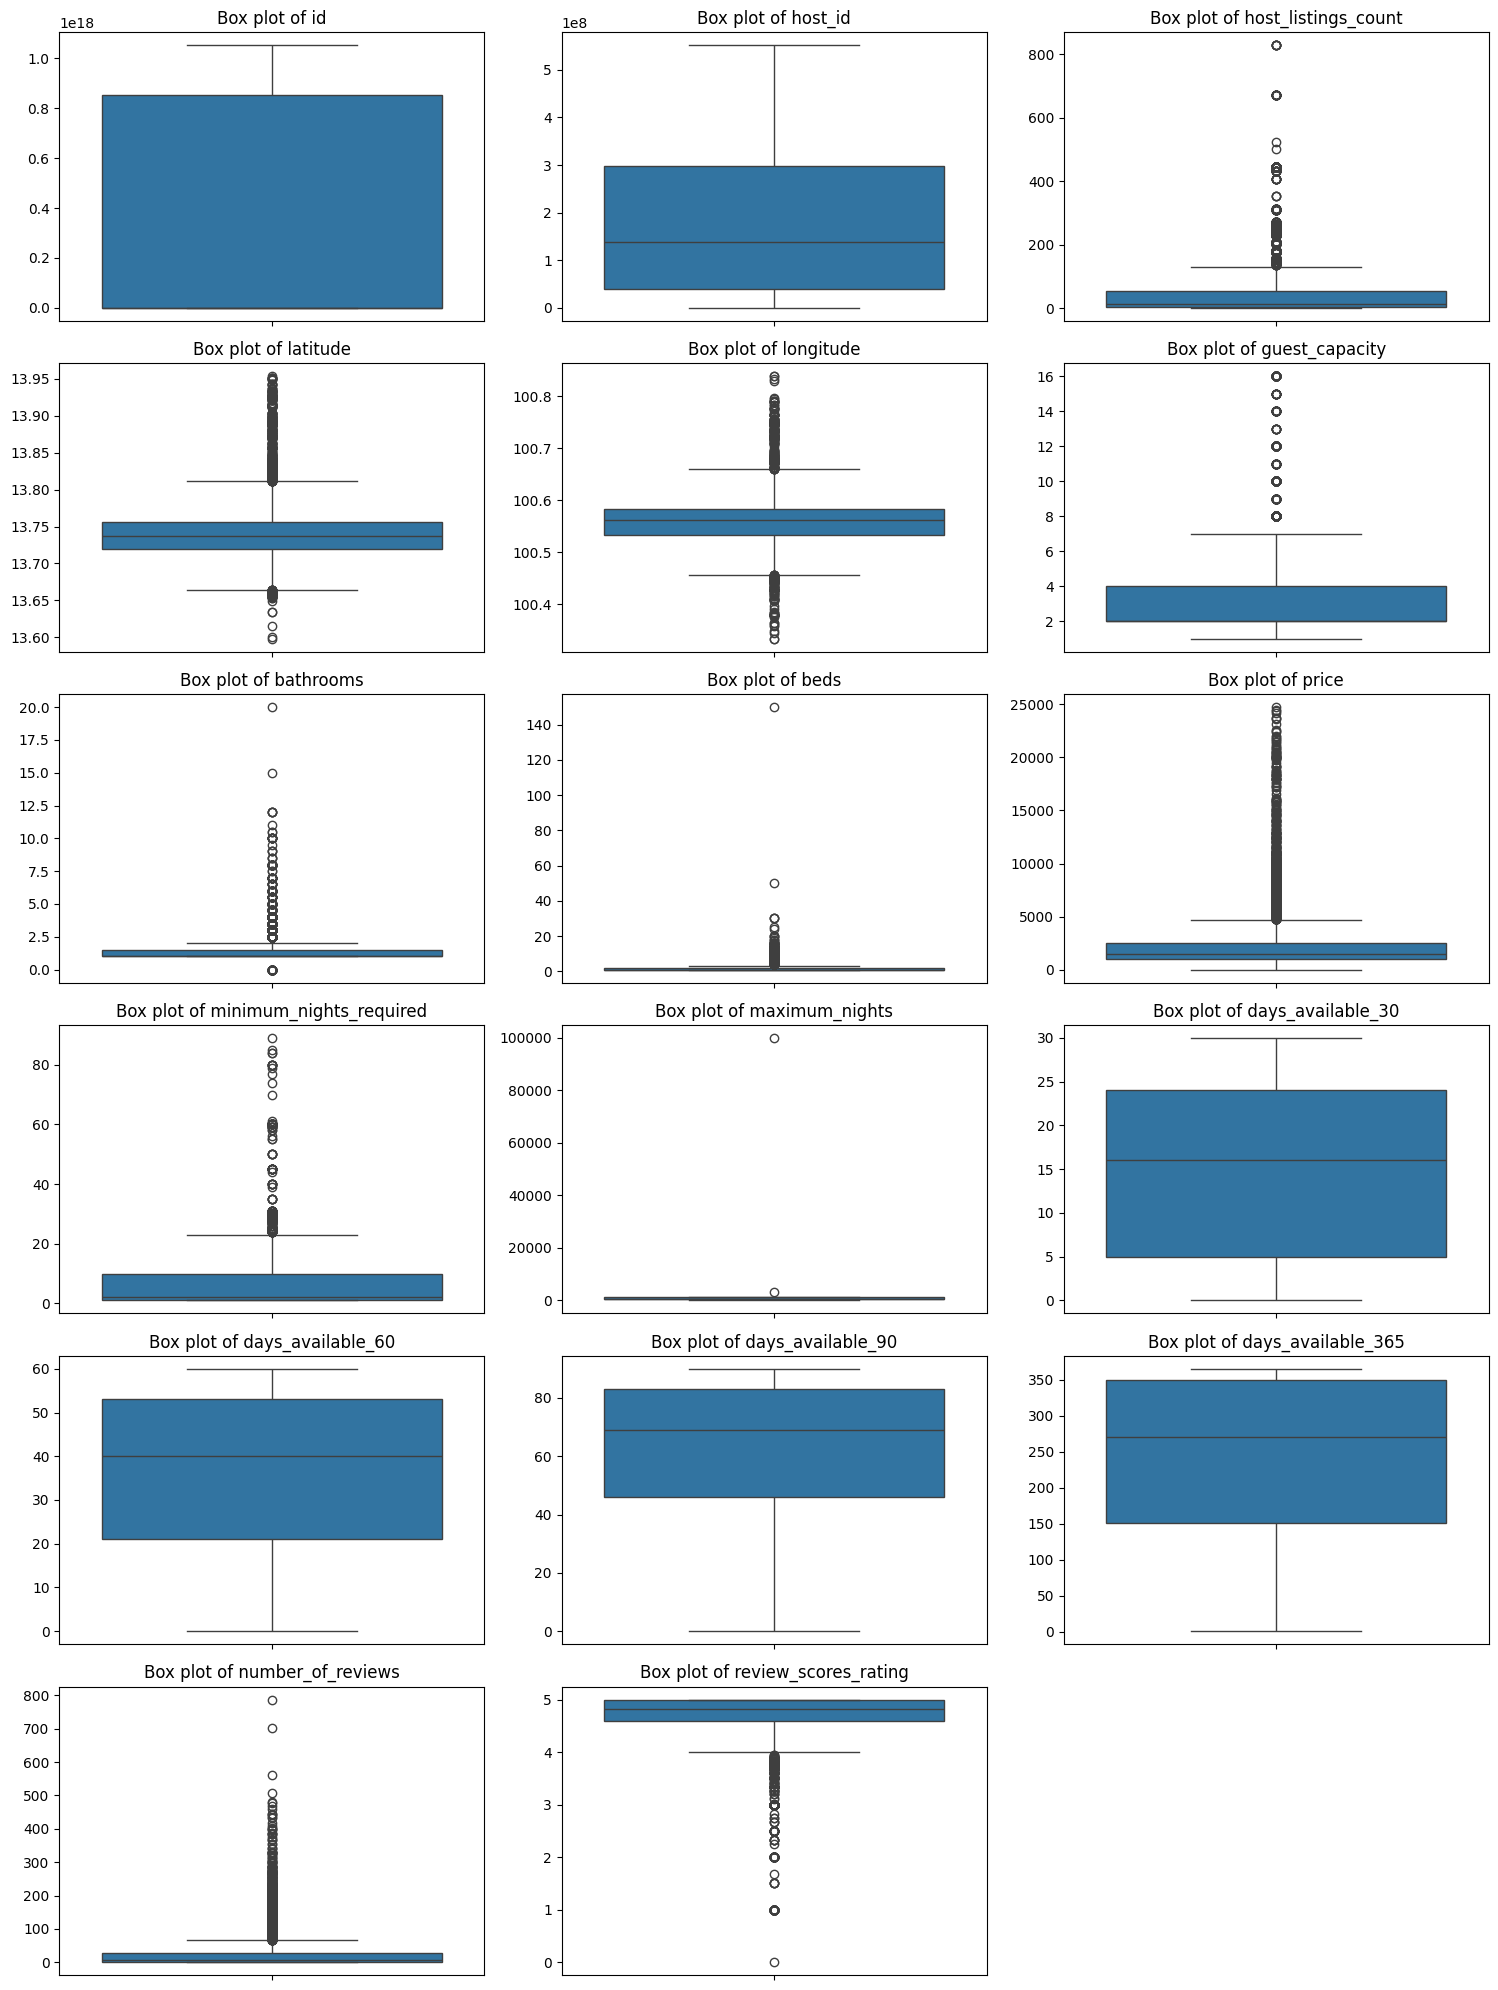

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_listings_data1 = cleaned_listings_data.select_dtypes(include=[np.number])
# Create subplots
# Calculate the number of rows needed to plot all columns
n_cols = len(cleaned_listings_data1.columns)
n_rows = n_cols // 3 + (n_cols % 3 > 0)  # Adds an extra row if there are any remainder columns

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Loop through the features and create a boxplot for each
for i, col in enumerate(cleaned_listings_data1.columns):
    sns.boxplot(y=cleaned_listings_data1[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused axes
for ax in axes[n_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

I'm going to keep them all since they are areas that can have higher values than others...

#Clean Calender Data

In [ ]:
nans_calender = calendar_data.isna().sum()
nans_calender

listing_id              0
date                    0
available               0
price                   0
adjusted_price    8067937
minimum_nights          4
maximum_nights          4
dtype: int64

Adjusted price is almost all NaNs. Minimum and Maximum nights seems unnecessary for this as it can be joined with the listings dataset which also has those columns. But, I'm going to keep those columns.  

In [ ]:
cleaned_calendar_data = calendar_data.drop(columns='adjusted_price') #too many nans
cleaned_calendar_data  = cleaned_calendar_data.dropna(subset=['minimum_nights']) #has 4 rows with nans
cleaned_calendar_data  = cleaned_calendar_data.dropna(subset=['maximum_nights']) # has 4 rows with nans
cleaned_calendar_data['price'] = cleaned_calendar_data['price'].replace('[$,]', '', regex=True).astype(float) #change price to a number
cleaned_calendar_data['available'] = cleaned_calendar_data['available'].map({'f': False, 't': True}) #change f and t to booleans values
# Convert 'date' column to datetime
cleaned_calendar_data['date'] = pd.to_datetime(cleaned_calendar_data['date'])

# Extract Month, Day, and Year into separate columns
cleaned_calendar_data['Month'] = cleaned_calendar_data['date'].dt.month
cleaned_calendar_data['Day'] = cleaned_calendar_data['date'].dt.day
cleaned_calendar_data['Year'] = cleaned_calendar_data['date'].dt.year

cleaned_calendar_data.drop(columns=['date'], inplace=True)
cleaned_calendar_data.head()

listing_id  available  price  minimum_nights  maximum_nights  Month  Day  \
0       27934      False   55.0             3.0            90.0     12   27   
1       27934      False   55.0             3.0            90.0     12   28   
2       27934      False   55.0             3.0            90.0     12   29   
3       27934      False   55.0             3.0            90.0     12   30   
4       27934      False   55.0             3.0            90.0     12   31   

   Year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023

##Graphs of Calender Data

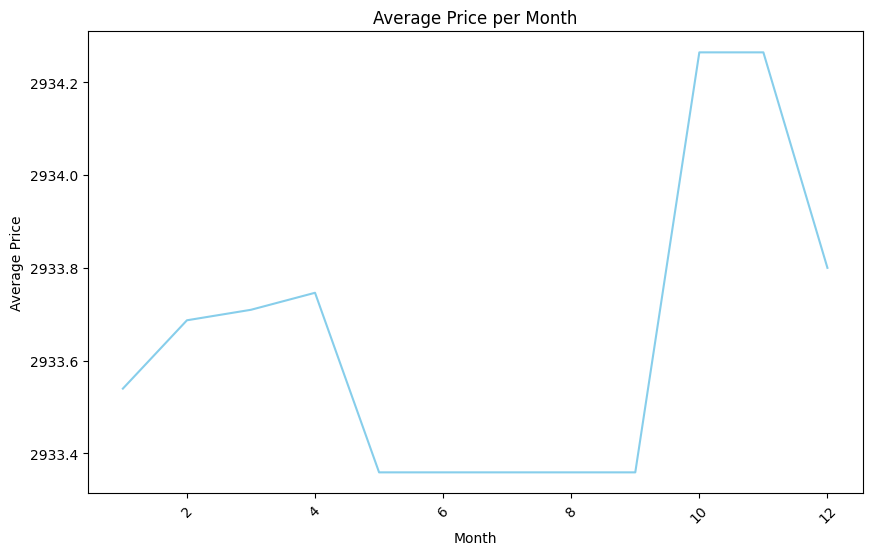

In [ ]:
# Group the data by 'Month' and calculate the average price for each month
average_price_per_month = cleaned_calendar_data.groupby(['Month'])['price'].mean().reset_index()

# Plot the average price per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_month, x='Month', y='price', color='skyblue')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The average price increased in April and October. Those are the dry months in Bangkok. June - September have the lowest average price and its also monsoon season there.

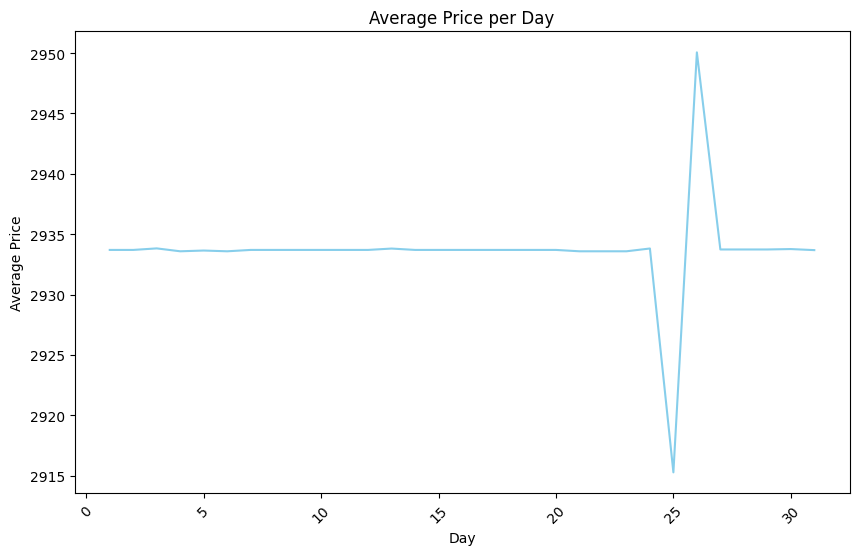

In [ ]:
# Group the data by 'day_of_month' and calculate the average price for each day
average_price_per_day = cleaned_calendar_data.groupby(['Day'])['price'].mean().reset_index()
# Plot the average price per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_day, x='Day', y='price', color='skyblue')
plt.title('Average Price per Day')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Weird. the 25th has the lowest but the 26th is the highest and the rest of the month is steady.

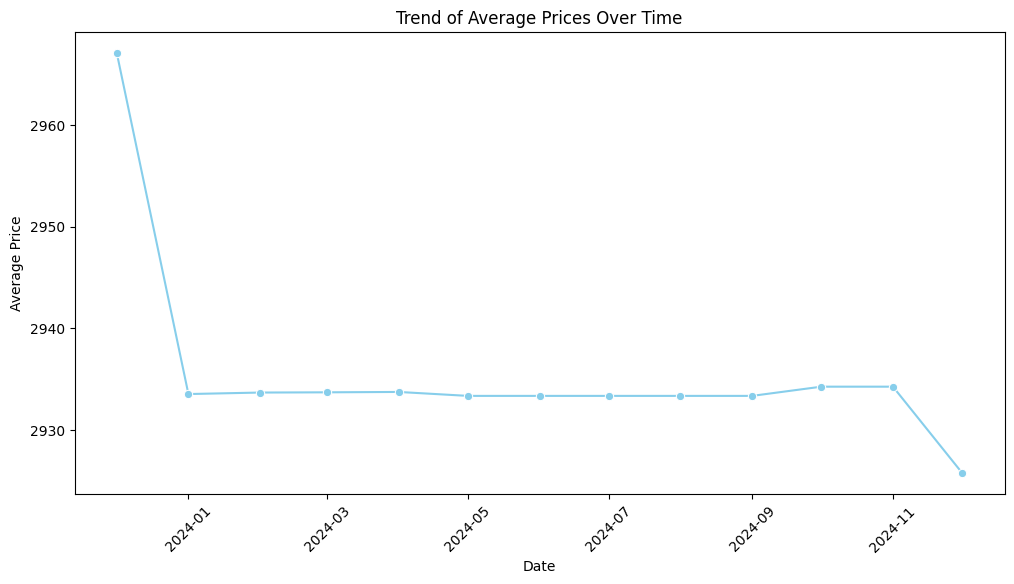

In [ ]:
# Group the data by 'Month' and calculate the average price for each month
average_price_per_month = cleaned_calendar_data.groupby(['Year', 'Month'])['price'].mean().reset_index()

# Convert 'Year' and 'Month' to a datetime format
average_price_per_month['Date'] = pd.to_datetime(average_price_per_month[['Year', 'Month']].assign(day=1))

# Plot the trend of average prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_month, x='Date', y='price', marker='o', color='skyblue')
plt.title('Trend of Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

December 2023 is the highest and November 2024 is the lowest.

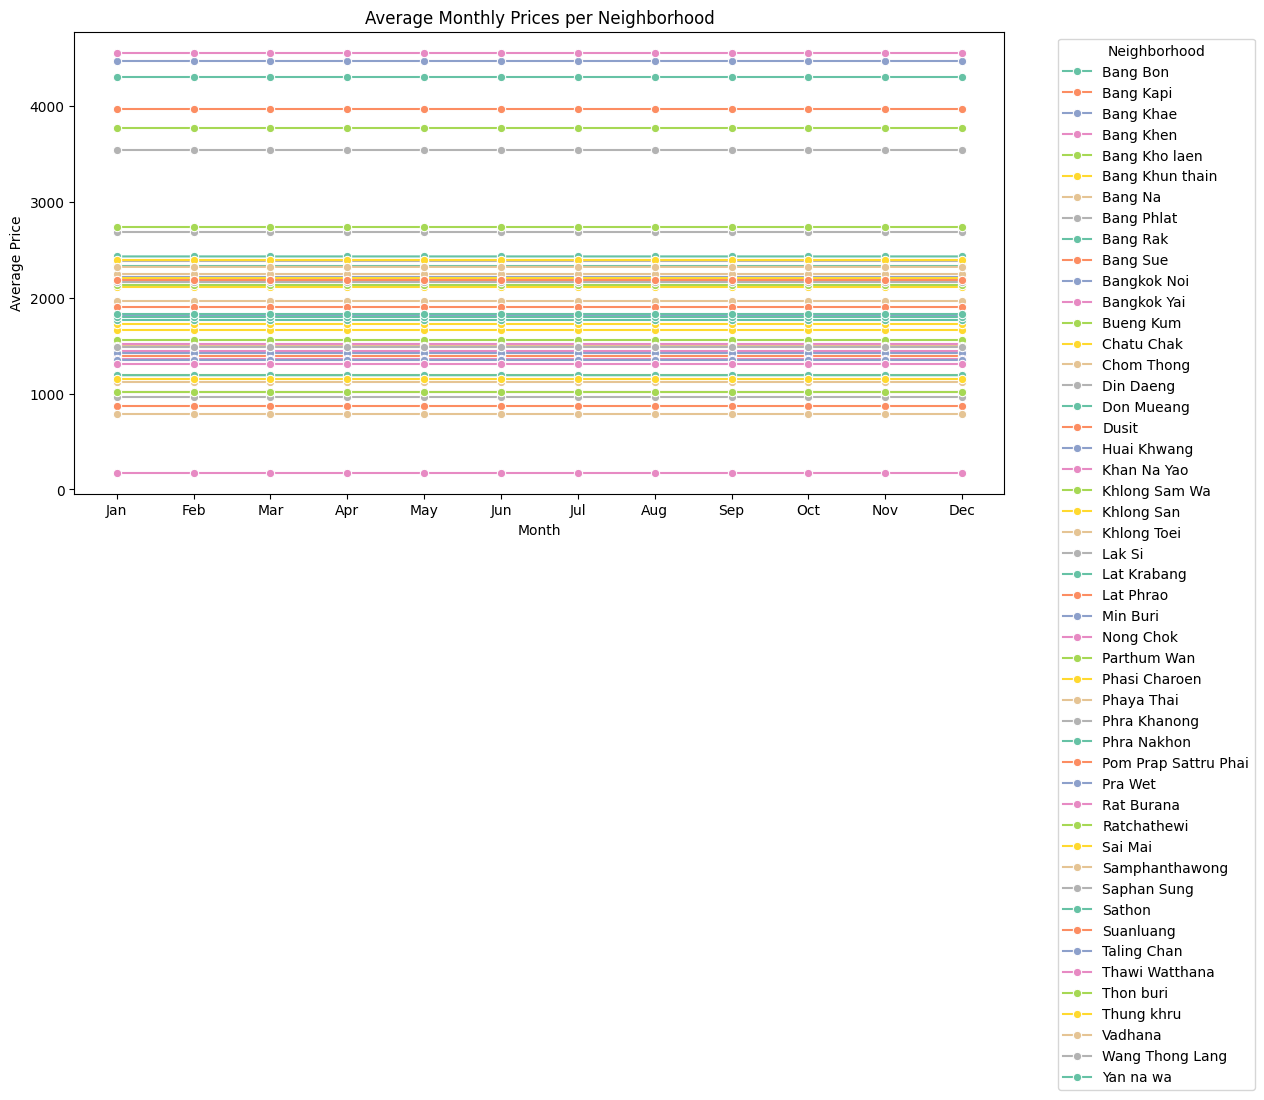

In [ ]:
# Merge the calendar data with the cleaned listings data to get the neighborhood information
merged_data = pd.merge(cleaned_calendar_data, cleaned_listings_data[['id', 'bangkok_neighbourhood']], left_on='listing_id', right_on='id', how='left')

# Group the merged data by 'bangkok_neighbourhood' and 'Month' and calculate the average price for each group
average_price_per_neighborhood = merged_data.groupby(['bangkok_neighbourhood', 'Month'])['price'].mean().reset_index()

# Filter out average prices over $500
average_price_per_neighborhood = average_price_per_neighborhood[average_price_per_neighborhood['price'] <= 20000]

# Plot the average prices per neighborhood for each month
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_neighborhood, x='Month', y='price', hue='bangkok_neighbourhood', marker='o', palette='Set2', ci=None)
plt.title('Average Monthly Prices per Neighborhood')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set month names for better readability
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Bang Kapi has the highest average month price, but the price doesn't change much between months.

##Summary Statistics

In [ ]:
cleaned_calendar_data.describe()

listing_id         price  minimum_nights  maximum_nights  \
count  8.068298e+06  8.068298e+06    8.068298e+06    8.068298e+06   
mean   4.311437e+17  2.933650e+03    1.374822e+01    7.899420e+05   
std    4.449914e+17  2.319410e+04    4.378792e+01    4.115962e+07   
min    2.793400e+04  0.000000e+00    1.000000e+00    1.000000e+00   
25%    2.924240e+07  8.000000e+02    1.000000e+00    3.650000e+02   
50%    5.381517e+07  1.300000e+03    2.000000e+00    1.125000e+03   
75%    8.897157e+17  2.200000e+03    1.300000e+01    1.125000e+03   
max    1.053584e+18  2.205309e+06    1.115000e+03    2.147484e+09   

              Month           Day          Year  
count  8.068298e+06  8.068298e+06  8.068298e+06  
mean   6.498861e+00  1.573144e+01  2.023984e+03  
std    3.444086e+00  8.809771e+00  1.254398e-01  
min    1.000000e+00  1.000000e+00  2.023000e+03  
25%    4.000000e+00  8.000000e+00  2.024000e+03  
50%    7.000000e+00  1.600000e+01  2.024000e+03  
75%    9.000000e+00  2.300000e+01  2.024000e+03  
max    1.200000e+01  3.100000e+01  2.024000e+03

#Graphs of Listings Data

In [ ]:
cleaned_listings_data['bangkok_neighbourhood'].value_counts()

bangkok_neighbourhood
Khlong Toei             2116
Vadhana                 1995
Huai Khwang             1042
Ratchathewi              926
Sathon                   651
Bang Rak                 586
Phra Khanong             498
Phra Nakhon              454
Parthum Wan              352
Chatu Chak               342
Din Daeng                306
Bang Na                  302
Khlong San               281
Phaya Thai               263
Suanluang                246
Bang Kapi                203
Bang Sue                 192
Bang Phlat               173
Thon buri                116
Yan na wa                114
Lat Krabang              110
Pom Prap Sattru Phai     101
Don Mueang                92
Bangkok Noi               83
Bang Kho laen             81
Lak Si                    76
Phasi Charoen             74
Samphanthawong            72
Pra Wet                   61
Bangkok Yai               53
Chom Thong                52
Bang Khen                 51
Dusit                     50
Wang Thong Lang      

There is very few data points for some which can skew the results.

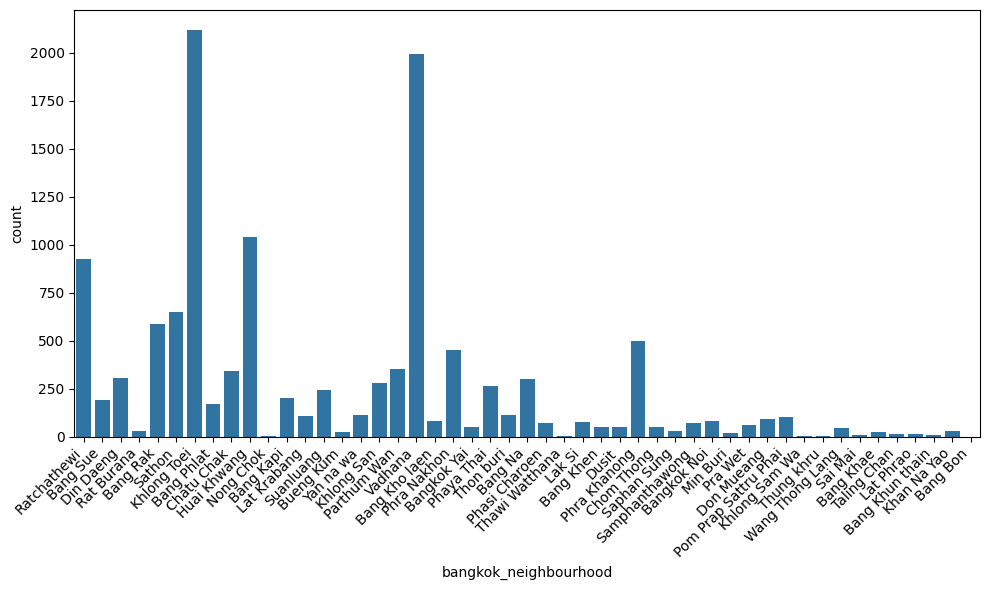

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="bangkok_neighbourhood", data=cleaned_listings_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

The Vandha neighbourhood has the most listings. Followed by Khlong Toei.

##Room type

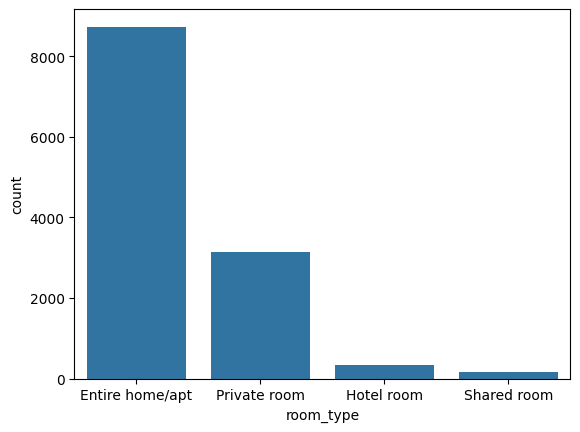

In [ ]:
ax = sns.countplot(x="room_type", data=cleaned_listings_data)

An entire home/apt is the most common room type.

##Neighbourhood vs availability of room

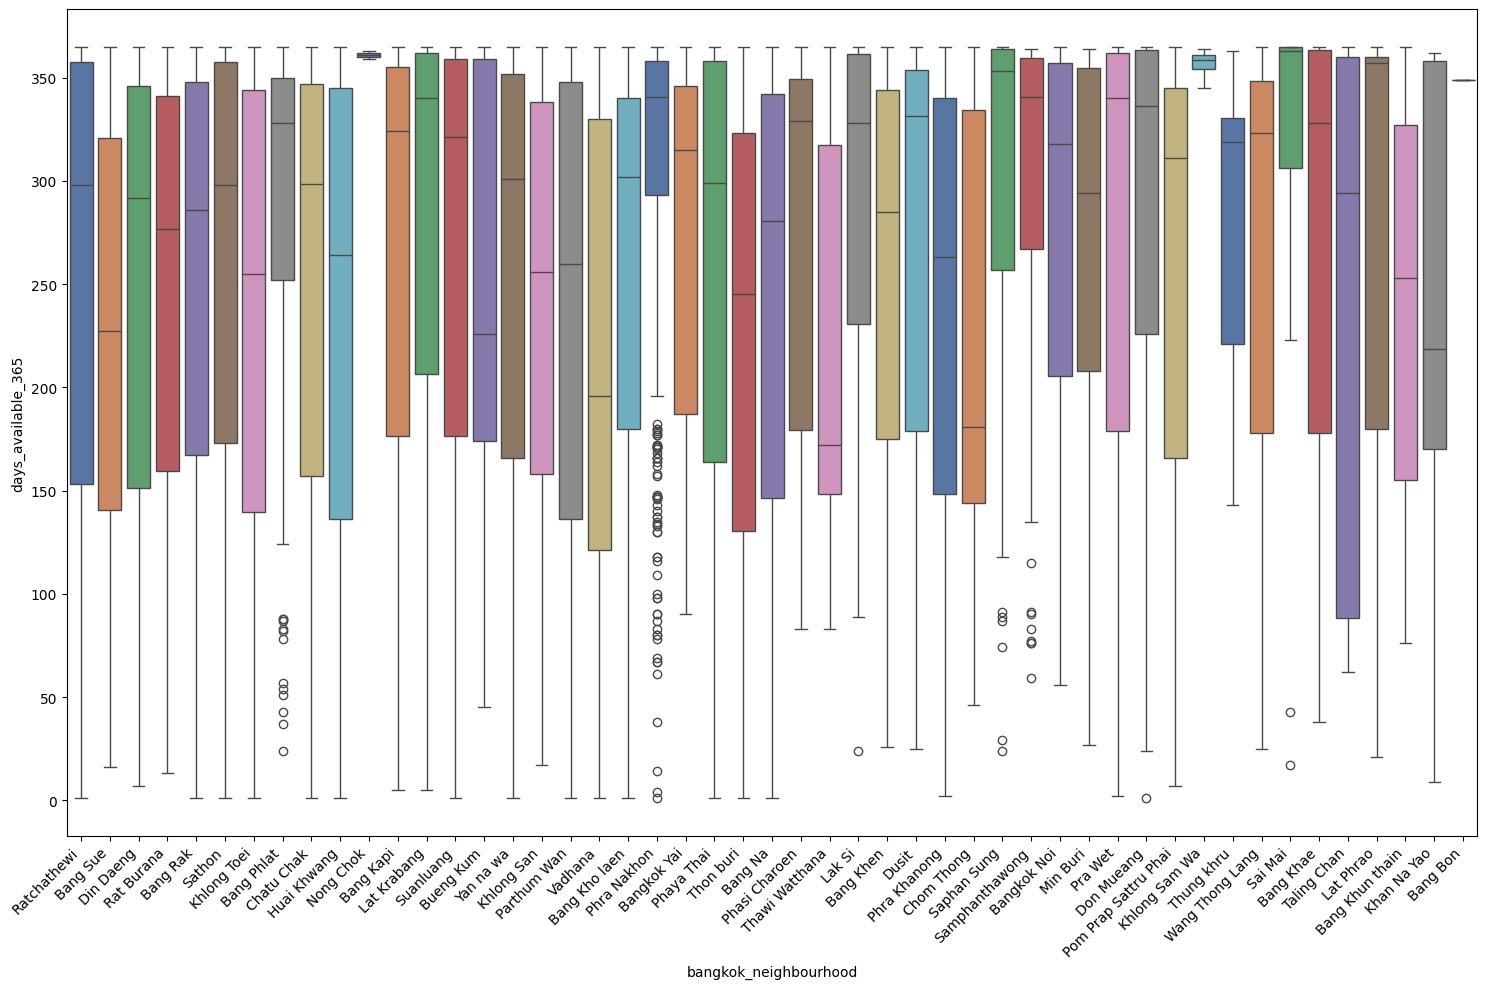

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=cleaned_listings_data, x='bangkok_neighbourhood',y='days_available_365', palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Kholong sam wai has the lowest followed by Nong Chok. But, it also only has 31 and 19 listings...


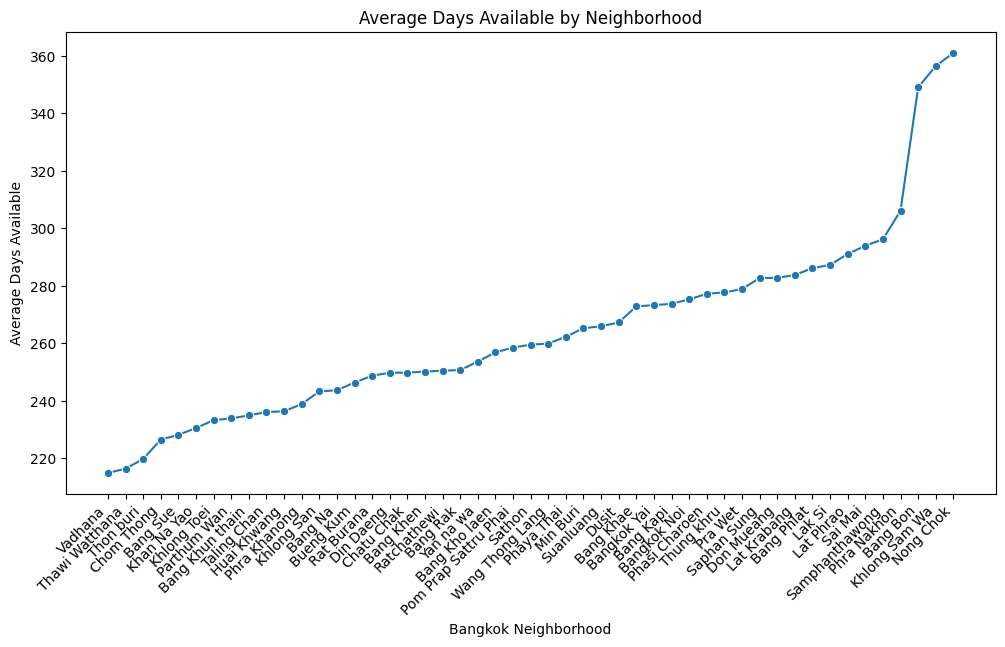

In [ ]:
# Calculate the mean 'days_available_365' for each neighborhood
mean_days = cleaned_listings_data.groupby('bangkok_neighbourhood')['days_available_365'].mean().reset_index()

# Sort the neighborhoods by the mean days available (Alternatively, sort by 'bangkok_neighbourhood' for alphabetical)
mean_days = mean_days.sort_values('days_available_365')

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=mean_days, x='bangkok_neighbourhood', y='days_available_365', marker='o')

# Improve readability
ax.set_xticklabels(mean_days['bangkok_neighbourhood'], rotation=45, ha="right")
ax.set_xlabel('Bangkok Neighborhood')
ax.set_ylabel('Average Days Available')
ax.set_title('Average Days Available by Neighborhood')

plt.show()

Vandhana has the lowest days available, while Nong Chok has the highest days available. This can indicate that Vadhana is a more popular neigbourhood to stay in in bangkok.

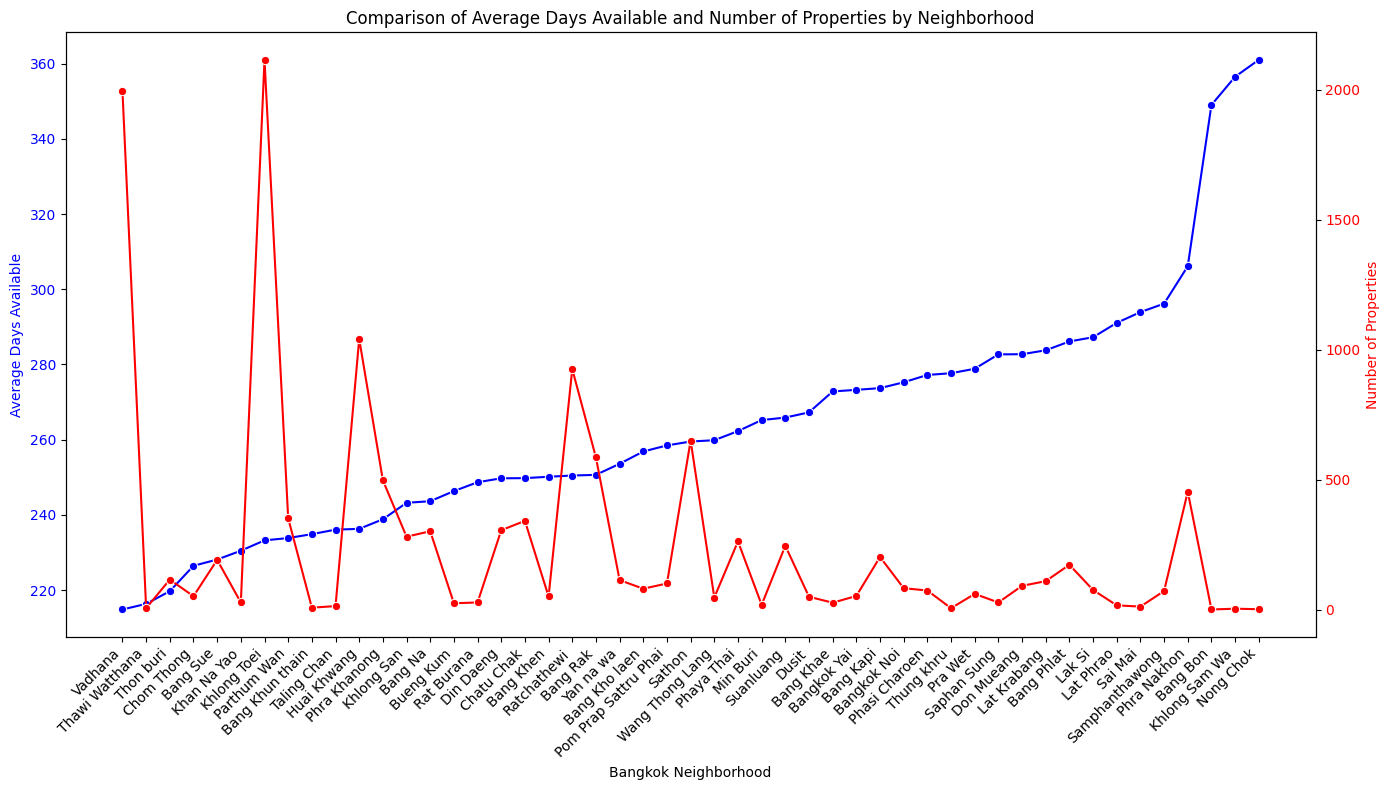

In [ ]:
# Calculate the mean 'days_available_365' and count of properties for each neighborhood
grouped_data = cleaned_listings_data.groupby('bangkok_neighbourhood')['days_available_365'].agg(['mean', 'count']).reset_index()
grouped_data.columns = ['bangkok_neighbourhood', 'average_days_available', 'number_of_properties']

# Sort the data by average days available for a meaningful line progression
grouped_data = grouped_data.sort_values('average_days_available')

# Create a plot
plt.figure(figsize=(14, 8))
ax1 = sns.lineplot(data=grouped_data, x='bangkok_neighbourhood', y='average_days_available', marker='o', color='b')
ax1.set_xticklabels(grouped_data['bangkok_neighbourhood'], rotation=45, ha='right')
ax1.set_xlabel('Bangkok Neighborhood')
ax1.set_ylabel('Average Days Available', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=grouped_data, x='bangkok_neighbourhood', y='number_of_properties', marker='o', color='r', ax=ax2)
ax2.set_ylabel('Number of Properties', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Comparison of Average Days Available and Number of Properties by Neighborhood')
plt.tight_layout()
plt.show()


Vadhana has the heighest number of properties but its average day avialble is 200. This suggests that this is a tourist hotspot.

##Room type vs availability

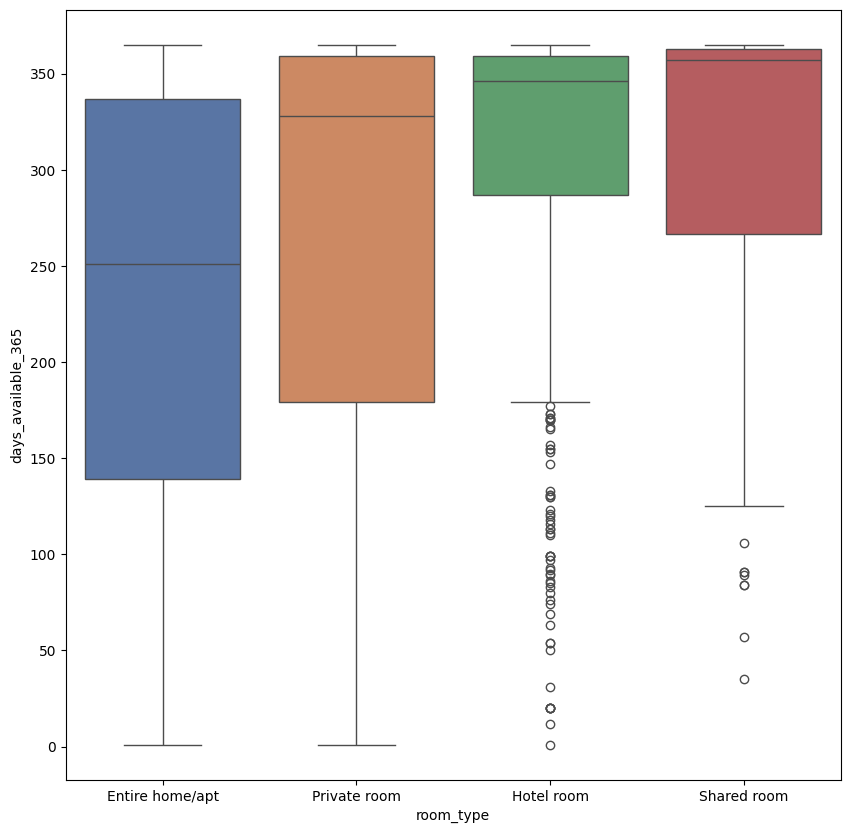

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=cleaned_listings_data, x='room_type',y='days_available_365', palette='deep')

Entire homes have the lowest average days available. Hotel and shared rooms have about the same number of days available. But, that makes sense since a single hotel has many more rooms than 1 house, and a shared room can sleep many people so theres more availility for more people

##Map of Bangkok with neighbourhood groups

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
fig = px.scatter(cleaned_listings_data, x='longitude', y='latitude',
                 color='bangkok_neighbourhood')
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

##Host

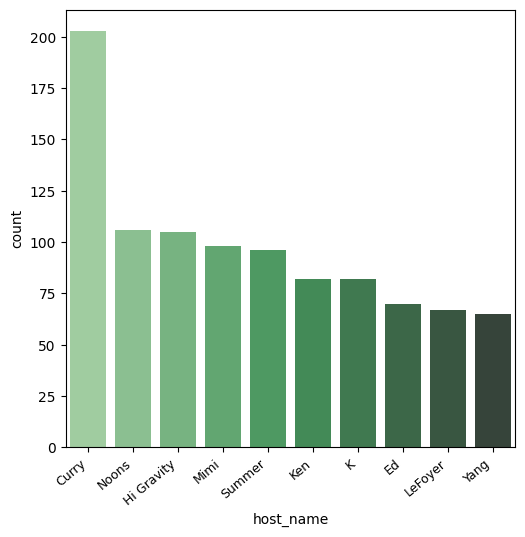

In [ ]:
plt.subplot(224)
ax=sns.countplot(x="host_name", data=cleaned_listings_data, palette="Greens_d",
              order=cleaned_listings_data.host_name.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

Alice has the most listings followed by Curry and Hi Gravity.


##Distribution Plots

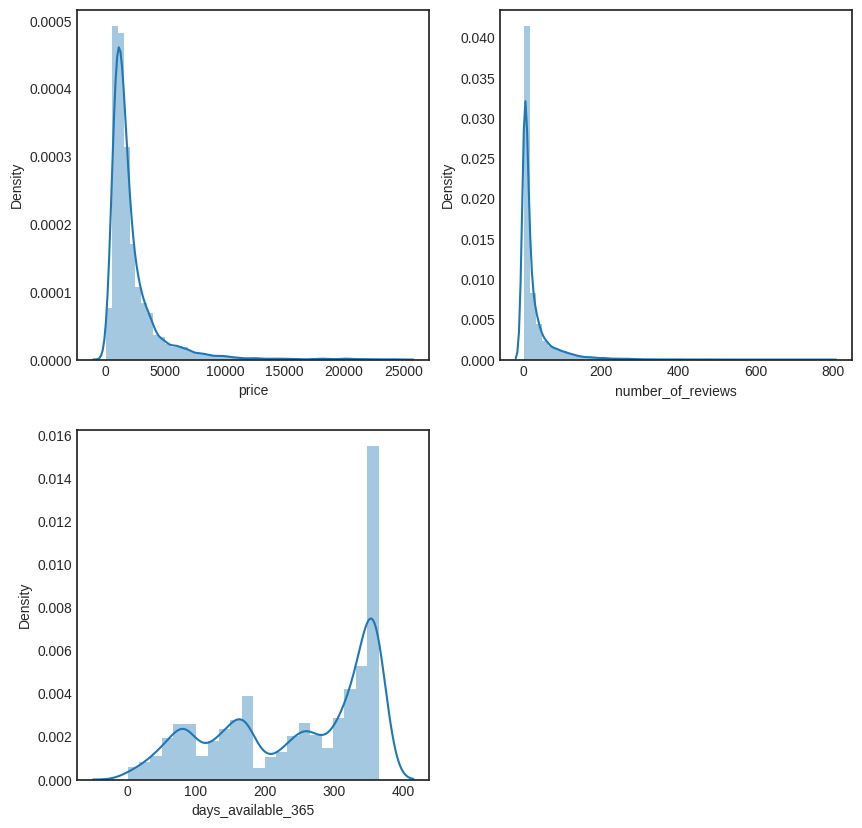

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.distplot(cleaned_listings_data['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(cleaned_listings_data['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(cleaned_listings_data['days_available_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)


##Coorelations

###Coorelation Matrix

In [ ]:
correlation_matrix = cleaned_listings_data.corr(numeric_only=True)
# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


id   host_id  host_listings_count  latitude  \
id                       1.000000  0.468588             0.132171 -0.023396   
host_id                  0.468588  1.000000             0.044359  0.026863   
host_listings_count      0.132171  0.044359             1.000000 -0.041933   
latitude                -0.023396  0.026863            -0.041933  1.000000   
longitude                0.067580  0.067858            -0.002259 -0.039002   
guest_capacity          -0.029207 -0.048809            -0.034585  0.042568   
bathrooms               -0.044379 -0.013785            -0.084223  0.031502   
beds                    -0.060008 -0.040556            -0.059763  0.045075   
price                    0.038628  0.046005             0.047591 -0.043878   
minimum_nights_required -0.024901 -0.033587             0.029797 -0.022166   
maximum_nights          -0.199041 -0.098480            -0.065164 -0.005476   
days_available_30       -0.014973  0.082301             0.178437  0.056248   
days_available_60        0.013275  0.081995             0.187616  0.041123   
days_available_90        0.033023  0.087826             0.182732  0.037513   
days_available_365      -0.026806  0.013345             0.048303  0.045290   
number_of_reviews       -0.337093 -0.249350            -0.041491  0.004055   
review_scores_rating     0.043585 -0.025680            -0.098630 -0.005507   

                         longitude  guest_capacity  bathrooms      beds  \
id                        0.067580       -0.029207  -0.044379 -0.060008   
host_id                   0.067858       -0.048809  -0.013785 -0.040556   
host_listings_count      -0.002259       -0.034585  -0.084223 -0.059763   
latitude                 -0.039002        0.042568   0.031502  0.045075   
longitude                 1.000000        0.003004  -0.000749 -0.030586   
guest_capacity            0.003004        1.000000   0.618763  0.585479   
bathrooms                -0.000749        0.618763   1.000000  0.567258   
beds                     -0.030586        0.585479   0.567258  1.000000   
price                    -0.010430        0.530054   0.397585  0.282852   
minimum_nights_required   0.012597       -0.166020  -0.123422 -0.122916   
maximum_nights           -0.018232        0.045194   0.036468  0.031682   
days_available_30         0.025814        0.010370   0.044584  0.043084   
days_available_60         0.019163       -0.000398   0.033151  0.033141   
days_available_90         0.019329        0.008661   0.034904  0.035645   
days_available_365       -0.018426       -0.017340   0.031984  0.042371   
number_of_reviews        -0.062743        0.089300   0.008327  0.041022   
review_scores_rating     -0.009460        0.000685   0.005825 -0.005197   

                            price  minimum_nights_required  maximum_nights  \
id                       0.038628                -0.024901       -0.199041   
host_id                  0.046005                -0.033587       -0.098480   
host_listings_count      0.047591                 0.029797       -0.065164   
latitude                -0.043878                -0.022166       -0.005476   
longitude               -0.010430                 0.012597       -0.018232   
guest_capacity           0.530054                -0.166020        0.045194   
bathrooms                0.397585                -0.123422        0.036468   
beds                     0.282852                -0.122916        0.031682   
price                    1.000000                -0.150195        0.015604   
minimum_nights_required -0.150195                 1.000000       -0.000585   
maximum_nights           0.015604                -0.000585        1.000000   
days_available_30        0.065688                -0.199342       -0.015245   
days_available_60        0.053278                -0.218528       -0.021119   
days_available_90        0.046546                -0.215163       -0.021291   
days_available_365      -0.023147                -0.078842        0.026832   
number_of_reviews       -0.

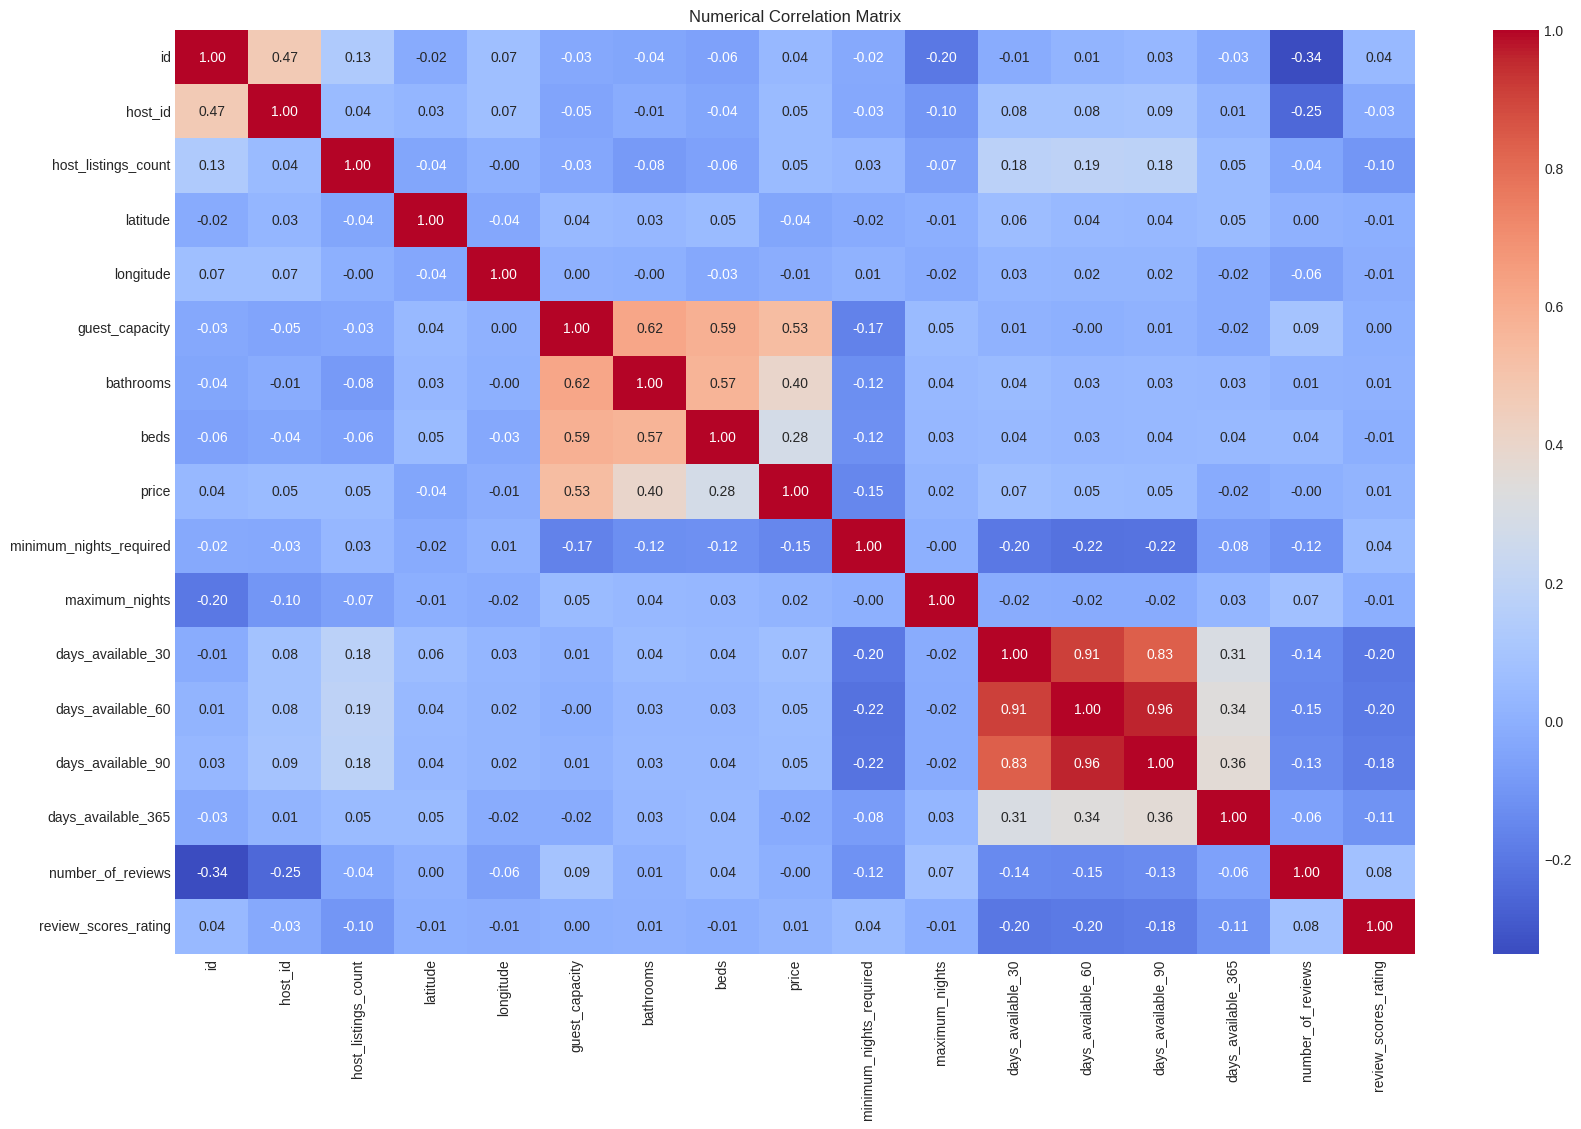

In [ ]:
# Visualizing the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Correlation Matrix')
plt.show()

Positive Correlations:

    id and host_id (0.468588): There's a moderate positive correlation, suggesting a linkage or systematic allocation between the listing ID and the host ID.
    *host_listings_count and days_available_ (0.178437, 0.187616, 0.182732)**: Indicates that hosts with more listings tend to have slightly higher availability over 30, 60, and 90 days.
    guest_capacity with bathrooms (0.618763) and beds (0.585479): As expected, larger accommodations tend to have more bathrooms and beds.
    guest_capacity and price (0.530054): Shows that accommodations designed for more guests typically command higher prices, which is logical due to larger space or more amenities.
    days_available_30, days_available_60, days_available_90 (high correlations among these, e.g., 0.909845 between 30 and 60 days): This strong correlation shows consistency in listing availability across different time frames, indicating that properties available in the short term tend to remain available in the medium term.

Negative Correlations:

    id with number_of_reviews (-0.337093): Suggests that newer listings (presumably with higher IDs) have fewer reviews.
    host_id with number_of_reviews (-0.249350): Similar to the above, indicating that hosts registered later (with higher host IDs) may have fewer reviews.
    *minimum_nights_required with days_available_ (-0.199342, -0.218528, -0.215163)**: Indicates that listings requiring longer minimum stays are less likely to be available, possibly because they are booked for longer periods.
    *review_scores_rating with days_available_ (-0.203326, -0.196030, -0.181525)**: Lower availability correlates with higher ratings, possibly suggesting that higher-rated properties are more in demand and thus booked more frequently.

# Clustering

##First I'm going to try with all of the data


In [ ]:
cleaned_listings_data = cleaned_listings_data.drop(columns='target', errors='ignore')
numeric_data = cleaned_listings_data
numeric_data  = numeric_data.drop(['id', 'property_type', 'host_id','room_type'], axis=1)
numeric_data = numeric_data.dropna()
categorical_cols = numeric_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
cleaned_listings_data_numerical = pd.get_dummies(numeric_data, columns=categorical_cols)

from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    numeric_data[col] = label_encoder.fit_transform(numeric_data[col])
    label_encoders[col] = label_encoder  # Store the label encoder for each column
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12386 entries, 0 to 21980
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   host_name                12386 non-null  int64  
 1   host_listings_count      12386 non-null  int64  
 2   bangkok_neighbourhood    12386 non-null  int64  
 3   latitude                 12386 non-null  float64
 4   longitude                12386 non-null  float64
 5   guest_capacity           12386 non-null  int64  
 6   bathrooms                12386 non-null  float64
 7   beds                     12386 non-null  float64
 8   price                    12386 non-null  float64
 9   minimum_nights_required  12386 non-null  int64  
 10  maximum_nights           12386 non-null  int64  
 11  days_available_30        12386 non-null  int64  
 12  days_available_60        12386 non-null  int64  
 13  days_available_90        12386 non-null  int64  
 14  days_available_365       12

##Scale Features

In [ ]:
# Scale the features
scaler = StandardScaler()
cleaned_listings_data_scaled = scaler.fit_transform(numeric_data)
cleaned_listings_data_scaled

array([[ 0.2050559 , -0.5302188 ,  0.66906791, ...,  0.7677085 ,
         0.82449641,  0.33610482],
       [ 0.68581034, -0.44831999, -1.38271499, ...,  0.94951106,
        -0.2744181 ,  0.18638308],
       [ 0.96116161, -0.5302188 , -0.92676324, ...,  0.74952825,
        -0.46834419,  0.14895264],
       ...,
       [ 1.37085766, -0.5302188 , -0.69878736, ..., -0.5958107 ,
        -0.51143887,  0.61683308],
       [-1.58805823, -0.47171965, -1.45870695, ..., -1.51391364,
        -0.53298622,  0.61683308],
       [ 0.90231638,  0.24196998, -0.39481952, ...,  0.13139954,
        -0.53298622,  0.61683308]])

##Elbow Method

In [ ]:
# Determine the range of clusters to try
inertias = []
cluster_range = range(1, 42)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cleaned_listings_data_scaled)
    inertias.append(kmeans.inertia_)


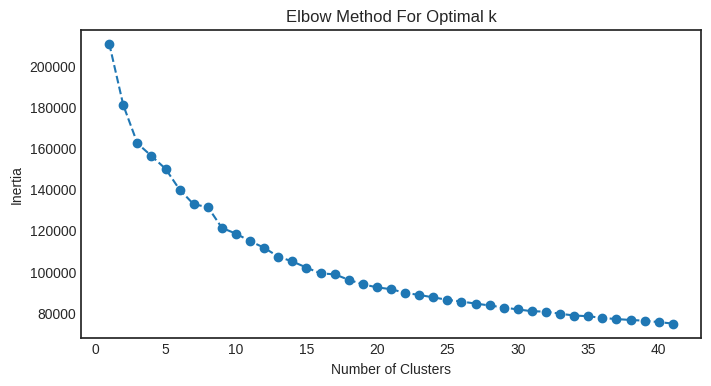

In [ ]:
# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o', linestyle = '--')
plt.title("Elbow Method For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

##Silhouette Analysis

In [ ]:
silhouette_scores = []
cluster_range = range(2, 42) #1 gives errors
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(cleaned_listings_data_scaled)
    silhouette_scores.append(silhouette_score(cleaned_listings_data_scaled, cluster_labels))


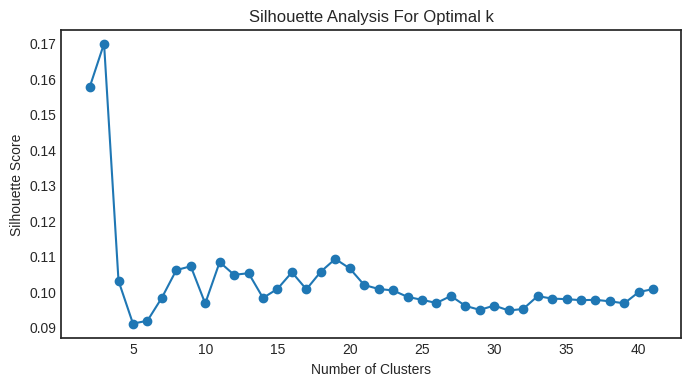

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Analysis For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

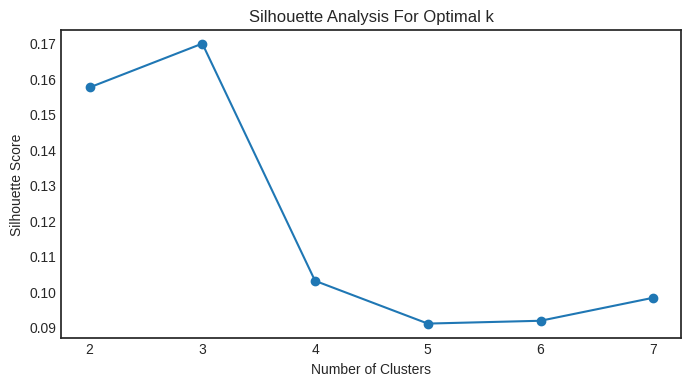

In [ ]:
# Plotting the silhouette scores more closly
plt.figure(figsize=(8, 4))
plt.plot(cluster_range[0:6], silhouette_scores[0:6], marker='o')
plt.title("Silhouette Analysis For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Optimal number of clusters is 3 on elbow and silhoutte method.

##Kmeans

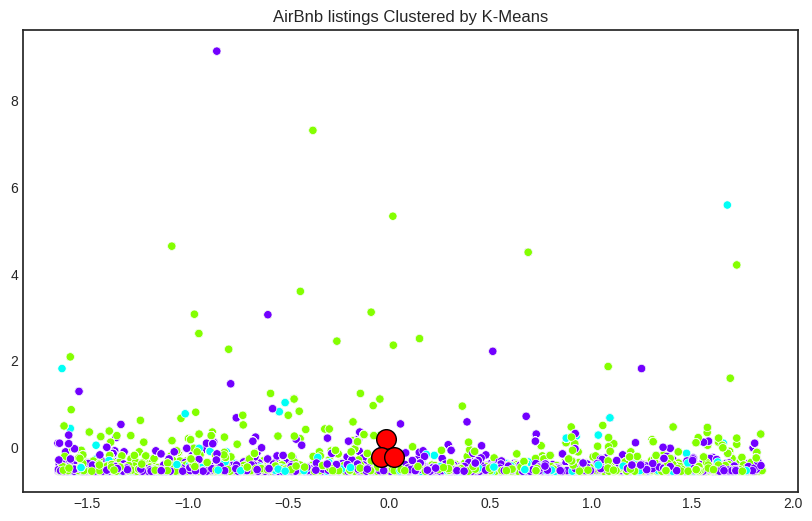

In [ ]:
optimal_k = 3 # Based on previous analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(cleaned_listings_data_scaled)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_listings_data_scaled[:, 0], y=cleaned_listings_data_scaled[:, 1], hue=clusters, palette=sns.color_palette("hsv", optimal_k), legend=None)
plt.title('AirBnb listings Clustered by K-Means')
#plotting the centroids of the clusters
centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker ='o', c='red', s=200, edgecolors='k')
plt.show()


Each point represents a listing, and its color represents the cluster that it belongs to. There doesn't seem to be a big distiction between them. But, the listings that are very far from the centroids may be outliers.

This looks a little better. But I don't think I can deduce anything from this clustering.

##Analyzing the Clusters

In [ ]:
numeric_data['Cluster'] = clusters
cluster_analysis = numeric_data.groupby('Cluster').mean()
cluster_analysis

host_name  host_listings_count  bangkok_neighbourhood   latitude  \
Cluster                                                                       
0        1466.340360            63.724582              27.125697  13.743249   
1        1442.178910            28.594787              28.959716  13.746442   
2        1501.913752            29.627112              26.991552  13.740357   

          longitude  guest_capacity  bathrooms      beds        price  \
Cluster                                                                 
0        100.560785        2.736826   1.212337  1.511469  1947.315096   
1        100.563780        9.063981   3.890995  6.003555  7125.905213   
2        100.560027        2.813949   1.226130  1.490766  1760.643222   

         minimum_nights_required  maximum_nights  days_available_30  \
Cluster                                                               
0                       6.098729      579.984501          22.460012   
1                       2.180095      777.636256          16.771327   
2                      11.657564      629.222004           4.956582   

         days_available_60  days_available_90  days_available_365  \
Cluster                                                             
0                50.952263          80.377402          276.562926   
1                39.010664          66.176540          266.080569   
2                16.846758          37.340275          200.388212   

         number_of_reviews  review_scores_rating  
Cluster                                           
0                18.200093              4.575969  
1                32.336493              4.682713  
2                34.192927              4.788084

Cluster 0 might be representing more commercial properties or those managed by hosts who list multiple properties. These listings are priced higher, potentially due to better amenities (more beds and bathrooms) or size. However, they have lower review scores and higher availability, which could be due to a variety of factors including less personalized service or higher pricing.

I can try clutering only the geographical type listings - latitude and longitude and neighborhood to try to undersrand location based pricing or popularity (Kmeans or DBSCAN). Also, price, room type, and acoomodation features. And, number of reviews by hosts listings and review scores (I can try hierarchical clustering to visualize the different categories of hosts) ..., or price by number of reviews.

Kmeans is also largely meant for normal and numerical data - which I dont really have. I have a lot of discrete data (1-5 whole numbers).

For the calender dataset. It is time-series. Fourier transform might help with that.


##Try clustering the Geographical type listings

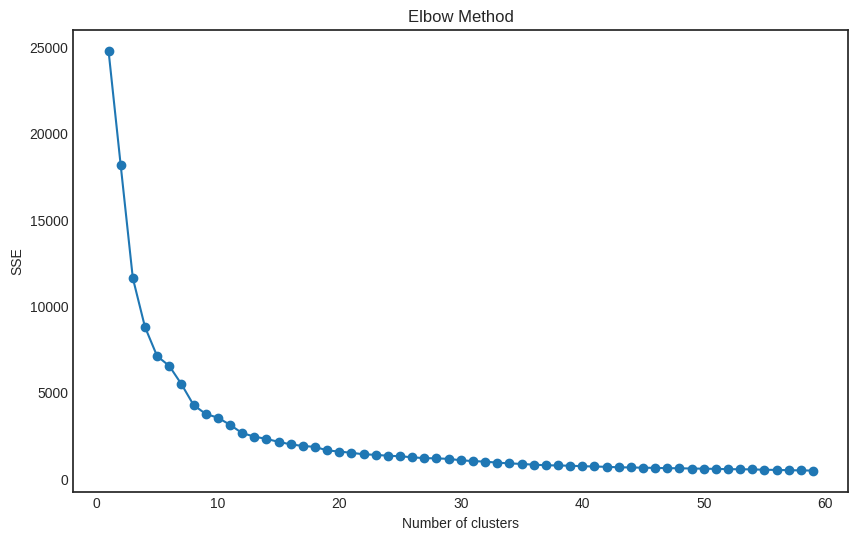

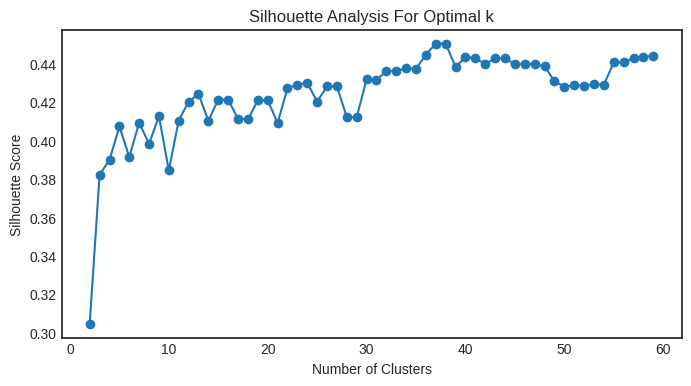

In [ ]:
numeric_data.head()
numeric_data_new = numeric_data[['latitude', 'longitude']] #There should be clusters for each neighborhood
numeric_data_new

scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_data_new)

sse = []
for k in range(1, 60):  # Test a range of k values to find the optimal
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

silhouette_scores = []
cluster_range = range(2, 60) #1 gives errors
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Analysis For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

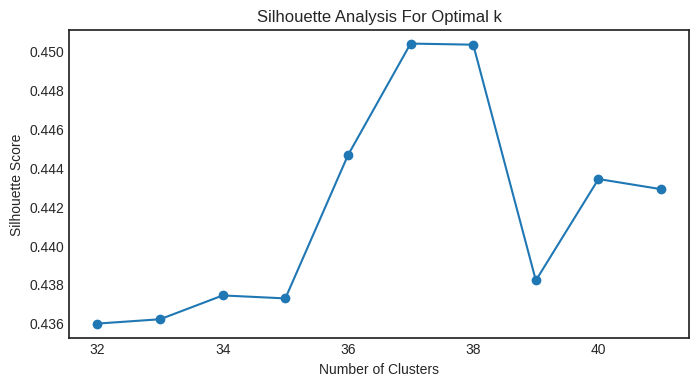

In [ ]:
# Plotting the silhouette scores more closly
plt.figure(figsize=(8, 4))
plt.plot(cluster_range[30:40], silhouette_scores[30:40], marker='o')
plt.title("Silhouette Analysis For Optimal k")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

37 Clusters gave the best results. With a silhoutte score of 0.451

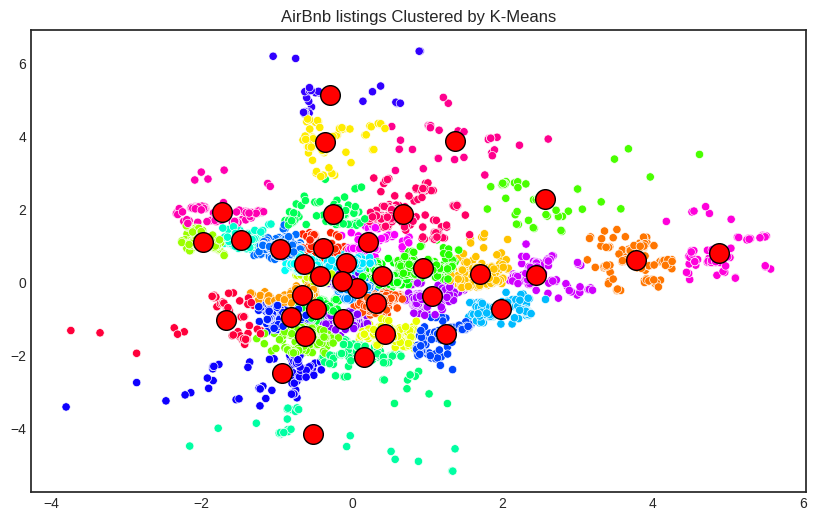

In [ ]:
optimal_k = 37  # Replace with the number of clusters chosen from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster labels to the original data
numeric_data['Cluster'] = clusters



# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters, palette=sns.color_palette("hsv", optimal_k), legend=None)
plt.title('AirBnb listings Clustered by K-Means')
#plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker ='o', c='red', s=200, edgecolors='k')
plt.show()




Much Better! It grouped it mostly by neighbourhood.

###Analyzing the clusters

In [ ]:
cluster_analysis = numeric_data.groupby('Cluster').mean()
cluster_analysis


host_name  host_listings_count  bangkok_neighbourhood   latitude  \
Cluster                                                                       
0        1379.340136            62.918367              44.741497  13.727849   
1        1592.688112            30.875524              35.053147  13.754163   
2        1377.233333             9.450000              16.058333  13.885379   
3        1253.716599            36.036437              41.554656  13.716996   
4        1542.553360            15.407115              14.328063  13.807096   
5        1796.000000            10.420455              25.193182  13.728615   
6        1636.967153            35.775547              29.562044  13.759160   
7        1556.880240            43.362275              26.095808  13.726142   
8        1480.754601            18.392638               6.000000  13.666913   
9        1630.392371            28.825613              27.068120  13.718592   
10       1902.377358             7.754717              15.452830  13.839909   
11       1531.422939            64.858423              17.971326  13.777862   
12       1458.368976            79.576807              18.792169  13.757317   
13       1361.437396            32.911519              17.108514  13.724048   
14       1526.652893             9.239669              39.578512  13.732509   
15       1928.620968             7.411290              15.959677  13.748571   
16       2100.931034             7.862069              10.413793  13.722602   
17       1518.845850            18.418972              22.304348  13.686244   
18       1399.935597            60.622951              26.384075  13.717900   
19       1294.728571            53.512500              39.400000  13.739075   
20       1547.917073            14.965854               9.097561  13.817283   
21       1332.263636            83.730000              37.834545  13.744561   
22       1395.839326            47.534831              30.769663  13.705948   
23       1748.427746            62.005780               8.132948  13.789926   
24       1477.175299            59.651394              30.193227  13.711403   
25       1544.132353            31.250000              21.742647  13.707042   
26       1558.206897            11.137931              24.206897  13.731414   
27       1440.273026            69.351974              35.605263  13.737362   
28       1393.057508            39.012780              25.763578  13.737846   
29       1515.942308            20.723077              28.746154  13.782743   
30       1902.973154            15.221477              14.181208  13.835127   
31       1496.635593            49.288136              12.644068  13.750302   
32       1604.033708            11.629213              17.415730  13.927242   
33       1397.834862            14.284404              20.403670  13.676808   
34       1727.838710             9.677419              27.354839  13.794267   
35       1570.631579            23.719298              11.549708  13.768239   
36       1572.073529            19.750000              35.911765  13.678659   

          longitude  guest_capacity  bathrooms      beds        price  \
Cluster                                                                 
0        100.601439        3.891156   1.544218  2.088435  2653.258503   
1        100.536424        3.800000   1.572028  2.345455  2339.344056   
2        100.587304        3.425000   1.487500  2.175000  1096.250000   
3        100.545835        2.910931   1.382591  1.647773  2359.218623   
4        100.570718        3.557312   1.545455  2.197628  2059.960474   
5        100.729681        3.215909   1.732955  2.272727  1479.534091   
6        100.498887        3.145985   1.565693  2.403285  1604.821168   
7        100.568705        3.362275   1.425150  1.685629  2912.546407   
8        100.608855        2.705521   1.297546  1.564417  1483.472393   
9        100.495732        3.108992   1.374659  1.746594  1935.326975   
10       100.660769        3.452830   1.575472  1.792

###Plotting the clusters

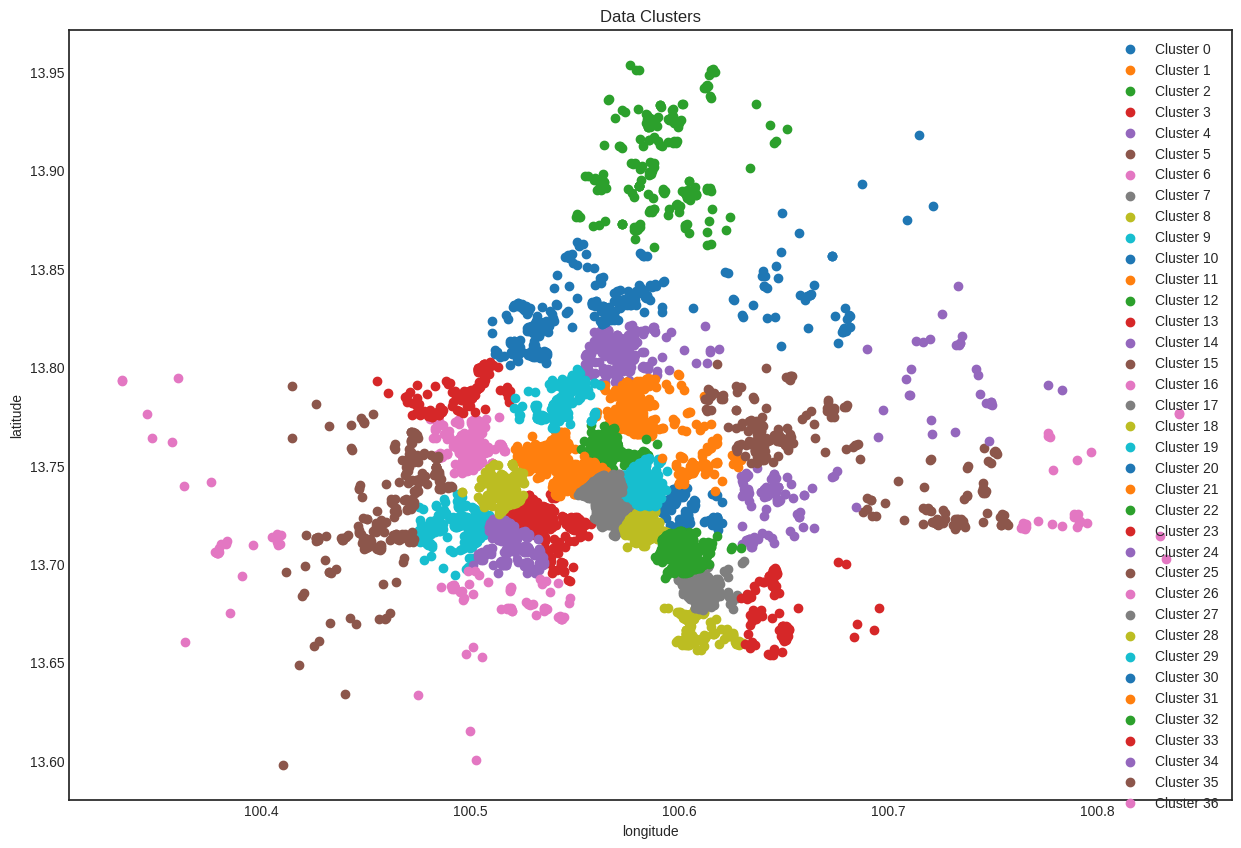

In [ ]:
plt.figure(figsize=(15, 10))
for cluster in range(optimal_k):
    cluster_data = numeric_data[numeric_data['Cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')
plt.title('Data Clusters')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
fig = px.scatter(cleaned_listings_data, x='longitude', y='latitude',
                 color='bangkok_neighbourhood')
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

High-End Properties

    Cluster 7 and Cluster 18 represent high-end accommodations with relatively high prices, indicating their position in premium market segments. These clusters stand out with high host listing counts, suggesting that hosts in these clusters might be more professional or experienced in managing multiple properties. The properties are located in desirable neighborhoods, possibly attracting wealthier tourists or business travelers. The good review scores highlight a consistent guest satisfaction.

Budget Options

    Cluster 8 is characterized by its budget-friendly options. This cluster has the lowest prices, which aligns with lower review scores, suggesting a trade-off between cost and quality. The high availability across various timeframes (30, 60, 90, 365 days) suggests that these properties are frequently available.

Family or Group-Friendly Properties

    Cluster 13 and Cluster 15 have a higher capacity for guests and a greater number of beds, making them ideal for families or larger groups. These clusters offer moderate pricing with good review scores, indicating that they provide a good balance of affordability and quality. The properties likely offer enough space and amenities to comfortably accommodate groups.

Exclusive, In-Demand Listings

    Cluster 25 features listings with higher prices and relatively low availability, suggesting these properties are either in high demand or are offered exclusively for certain times of the year. The consistently high review scores across various categories highlight a strong focus on quality and guest experience, which might justify the higher pricing and contribute to the reduced availability due to popular demand.

#Regression

First going to change prices to usd to make the results more easiy understood.

In [ ]:
cleaned_listings_data['price'] = cleaned_listings_data['price']*0.027
cleaned_listings_data.head()

id  host_id        host_name  host_listings_count  \
0   27934   120437           Nuttee                    2   
3  820395   822284  Rae And Charlie                    9   
5   35780   153730          Sirilak                    2   
6  822214   822284  Rae And Charlie                    9   
7   48736   222005         Athitaya                    1   

  bangkok_neighbourhood  latitude  longitude                property_type  \
0           Ratchathewi  13.75983  100.54134                 Entire condo   
3              Bang Sue  13.83026  100.52082            Entire guesthouse   
5             Din Daeng  13.78823  100.57256  Private room in rental unit   
6              Bang Sue  13.83148  100.52307                  Entire home   
7            Rat Burana  13.68556  100.49535  Private room in rental unit   

         room_type  guest_capacity  bathrooms  beds   price  \
0  Entire home/apt               3        1.5   1.0  51.381   
3  Entire home/apt               2        1.0   1.0  18.900   
5     Private room               2        1.0   1.0  34.722   
6  Entire home/apt               4        1.0   3.0  32.400   
7     Private room               2        1.0   1.0  42.093   

   minimum_nights_required  maximum_nights  days_available_30  \
0                        3              90                  0   
3                        7             365                 14   
5                       14             180                  0   
6                        3             365                  7   
7                        3            1095                 30   

   days_available_60  days_available_90  days_available_365  \
0                 24                 54                 329   
3                 44                 74                 349   
5                 22                 52                 327   
6                 37                 67                 157   
7                 60                 90                 365   

   number_of_reviews  review_scores_rating  
0                 64                  4.85  
3                 13                  4.77  
5                  4                  4.75  
6                 27                  4.84  
7                  1                  5.00

I'm going to drop property type as it seems inconsistant. I'm also going to encode the object variables.  

In [ ]:
cleaned_listings_data = cleaned_listings_data.drop(['host_name','property_type', 'id', 'host_id'], axis=1)
encoded = pd.get_dummies(cleaned_listings_data, columns=['bangkok_neighbourhood', 'room_type'], dtype = int)
encoded.head()

host_listings_count  latitude  longitude  guest_capacity  bathrooms  beds  \
0                    2  13.75983  100.54134               3        1.5   1.0   
3                    9  13.83026  100.52082               2        1.0   1.0   
5                    2  13.78823  100.57256               2        1.0   1.0   
6                    9  13.83148  100.52307               4        1.0   3.0   
7                    1  13.68556  100.49535               2        1.0   1.0   

    price  minimum_nights_required  maximum_nights  days_available_30  \
0  51.381                        3              90                  0   
3  18.900                        7             365                 14   
5  34.722                       14             180                  0   
6  32.400                        3             365                  7   
7  42.093                        3            1095                 30   

   days_available_60  days_available_90  days_available_365  \
0                 24                 54                 329   
3                 44                 74                 349   
5                 22                 52                 327   
6                 37                 67                 157   
7                 60                 90                 365   

   number_of_reviews  review_scores_rating  bangkok_neighbourhood_Bang Bon  \
0                 64                  4.85                               0   
3                 13                  4.77                               0   
5                  4                  4.75                               0   
6                 27                  4.84                               0   
7                  1                  5.00                               0   

   bangkok_neighbourhood_Bang Kapi  bangkok_neighbourhood_Bang Khae  \
0                                0                                0   
3                                0                                0   
5                                0                                0   
6                                0                                0   
7                                0                                0   

   bangkok_neighbourhood_Bang Khen  bangkok_neighbourhood_Bang Kho laen  \
0                                0                                    0   
3                                0                                    0   
5                                0                                    0   
6                                0                                    0   
7                                0                                    0   

   bangkok_neighbourhood_Bang Khun thain  bangkok_neighbourhood_Bang Na  \
0                                      0                              0   
3                                      0                              0   
5                                      0                              0   
6                                      0                              0   
7                                      0                              0   

   bangkok_neighbourhood_Bang Phlat  bangkok_neighbourhood_Bang Rak  \
0                                 0                               0   
3                                 0                               0   
5                                 0                               0   
6                                 0                               0   
7                                 0                               0   

   bangkok_neighbourhood_Bang Sue  bangkok_neighbourhood_Bangkok Noi  \
0                               0                                  0   
3                               1                                  0   
5                               0                                  0   
6                               1                                  0   
7                               0                                  0   

   bangkok_neighbourhood_Bangkok Yai  bangkok_

###Run multiple models to identify which performs best

In [ ]:
y = encoded['price']
X = encoded.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

models = [
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'model': type(model).__name__,
        'MSE': mse,
        'R2': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

                        model           MSE            R2
0                         SVR  3.389589e+03  2.440056e-01
1       DecisionTreeRegressor  3.172583e+03  2.924055e-01
2         KNeighborsRegressor  2.390889e+03  4.667499e-01
3           AdaBoostRegressor  3.856651e+03  1.398348e-01
4       RandomForestRegressor  1.768163e+03  6.056393e-01
5         ExtraTreesRegressor  1.750236e+03  6.096375e-01
6   GradientBoostingRegressor  2.090217e+03  5.338100e-01
7            LinearRegression  1.194443e+21 -2.664017e+17
8                       Ridge  2.683889e+03  4.014009e-01
9                       Lasso  2.707614e+03  3.961095e-01
10                 ElasticNet  2.987350e+03  3.337188e-01


None of the MSEs make sense for my data in USD. Linear regression is really off. Random Forest and Extra Trees Regressors performed the best.

#Classifer - bin prices

In [ ]:
bins = range(0, 800, 50)  # Creating bins from 0 to 750 with intervals of 50
labels = range(len(bins) - 1)
encoded['price_binned'] = pd.cut(encoded['price'], bins=bins, labels=labels, include_lowest=True)

# Define X and y
y = encoded['price_binned']
X = encoded.drop(['price', 'price_binned'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Classifier models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    RidgeClassifier()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results.append({
        'model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                        model  Accuracy  Precision    Recall  F1-score
0                         SVC  0.698741   0.638568  0.698741  0.653645
1      DecisionTreeClassifier  0.685825   0.690771  0.685825  0.687973
2        KNeighborsClassifier  0.715854   0.682953  0.715854  0.694931
3          AdaBoostClassifier  0.637391   0.554686  0.637391  0.591999
4      RandomForestClassifier  0.776235   0.754300  0.776235  0.757832
5        ExtraTreesClassifier  0.783339   0.766101  0.783339  0.770229
6  GradientBoostingClassifier  0.695512   0.668793  0.695512  0.671823
7          LogisticRegression  0.682273   0.618600  0.682273  0.642539
8             RidgeClassifier  0.663868   0.556369  0.663868  0.592946


Significantly better than regression. Extra Trees and Random Forest Classifiers performed the best.

Model: SVC
Accuracy of the Model: 0.6987407168227316

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1940
           1       0.48      0.44      0.46       718
           2       0.32      0.05      0.08       206
           3       0.24      0.17      0.20       103
           4       0.40      0.04      0.06        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       1.00      0.20      0.33         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.70      3097
   macro avg       0.23      0.13      0.14      3097
we

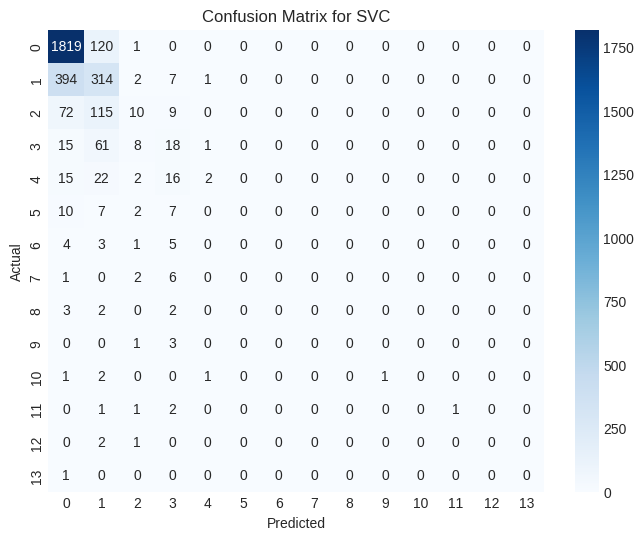

Model: DecisionTreeClassifier
Accuracy of the Model: 0.6803358088472715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1940
           1       0.50      0.52      0.51       718
           2       0.35      0.40      0.38       206
           3       0.35      0.33      0.34       103
           4       0.27      0.25      0.26        57
           5       0.14      0.19      0.16        26
           6       0.40      0.31      0.35        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.25      0.20      0.22         5
          11       0.33      0.20      0.25         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.68      3097
   macro avg       0.25      0.23    

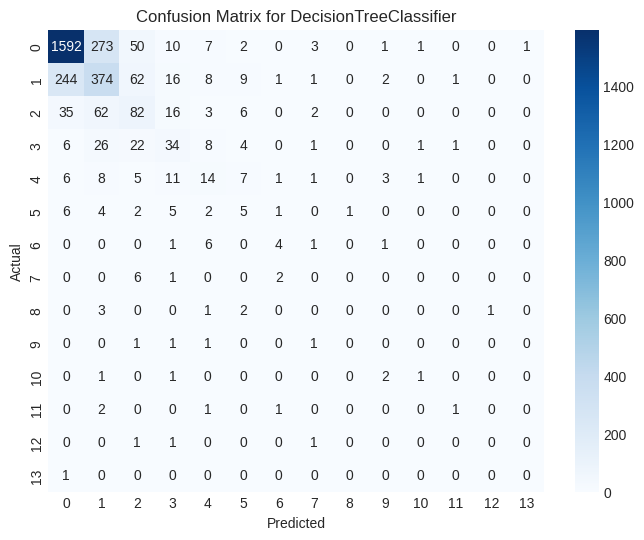

Model: KNeighborsClassifier
Accuracy of the Model: 0.7158540523086858

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85      1940
           1       0.55      0.50      0.52       718
           2       0.42      0.27      0.33       206
           3       0.37      0.29      0.33       103
           4       0.40      0.18      0.24        57
           5       0.27      0.12      0.16        26
           6       0.29      0.15      0.20        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.72      3097
   macro avg       0.22      0.17      

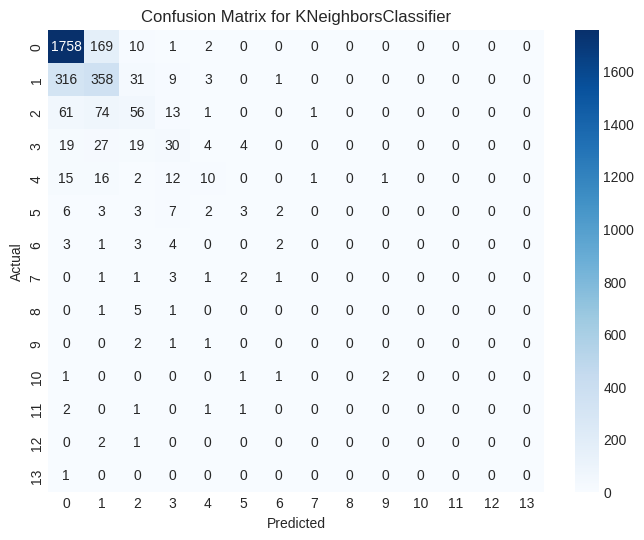

Model: AdaBoostClassifier
Accuracy of the Model: 0.6373910235711979

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      1940
           1       0.36      0.36      0.36       718
           2       0.00      0.00      0.00       206
           3       0.09      0.03      0.04       103
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.64      3097
   macro avg       0.09      0.09      0.

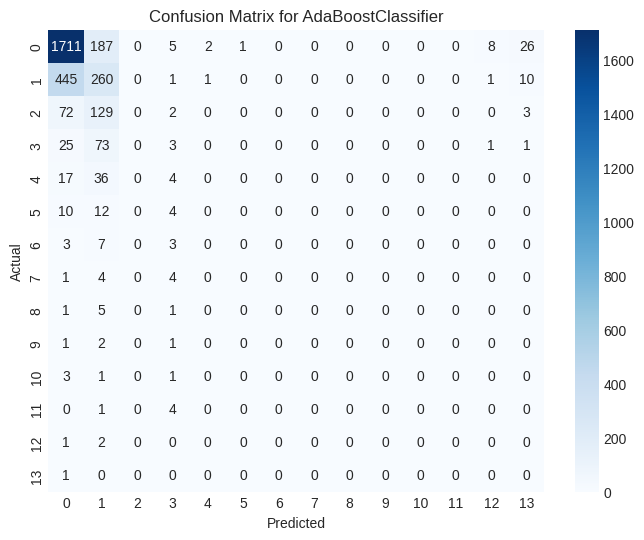

Model: RandomForestClassifier
Accuracy of the Model: 0.780109783661608

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1940
           1       0.66      0.59      0.62       718
           2       0.57      0.39      0.46       206
           3       0.58      0.41      0.48       103
           4       0.68      0.26      0.38        57
           5       0.73      0.31      0.43        26
           6       0.43      0.23      0.30        13
           7       0.00      0.00      0.00         9
           8       1.00      0.14      0.25         7
           9       0.25      0.25      0.25         4
          10       0.00      0.00      0.00         5
          11       0.33      0.20      0.25         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.78      3097
   macro avg       0.43      0.27     

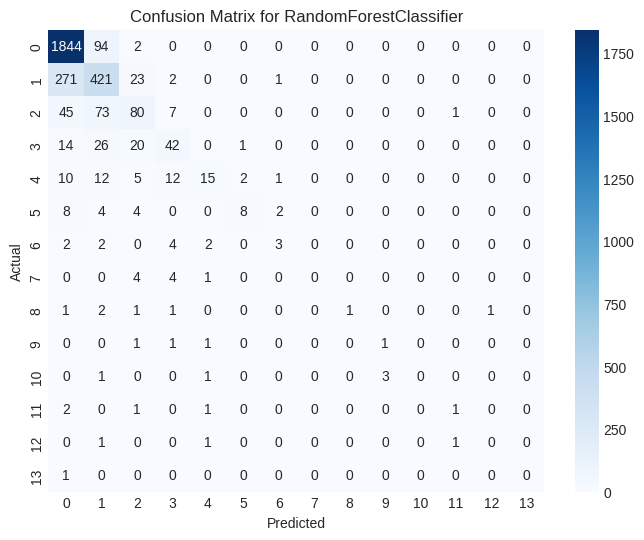

Model: ExtraTreesClassifier
Accuracy of the Model: 0.778818211172102

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1940
           1       0.65      0.60      0.63       718
           2       0.58      0.41      0.48       206
           3       0.52      0.42      0.46       103
           4       0.55      0.30      0.39        57
           5       0.58      0.42      0.49        26
           6       0.29      0.15      0.20        13
           7       0.00      0.00      0.00         9
           8       1.00      0.14      0.25         7
           9       0.33      0.25      0.29         4
          10       0.00      0.00      0.00         5
          11       0.50      0.20      0.29         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.78      3097
   macro avg       0.42      0.27      0

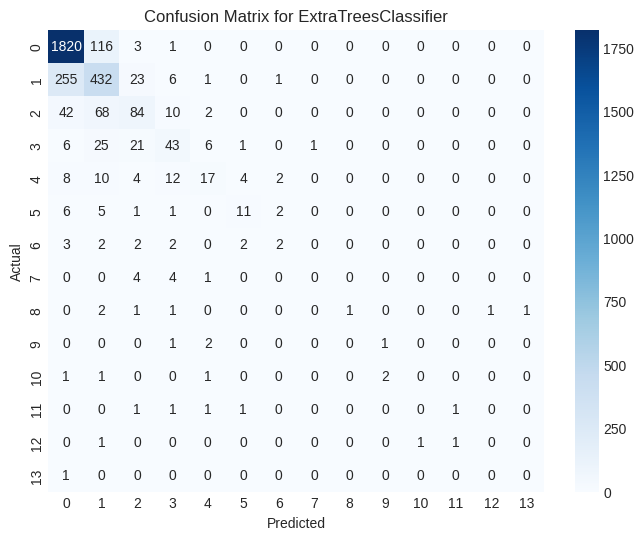

Model: GradientBoostingClassifier
Accuracy of the Model: 0.7010009686793671

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1940
           1       0.55      0.45      0.49       718
           2       0.41      0.13      0.19       206
           3       0.39      0.31      0.34       103
           4       0.35      0.16      0.22        57
           5       0.25      0.15      0.19        26
           6       0.11      0.08      0.09        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.20      0.20      0.20         5
          11       0.20      0.20      0.20         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.70      3097
   macro avg       0.23      0.19

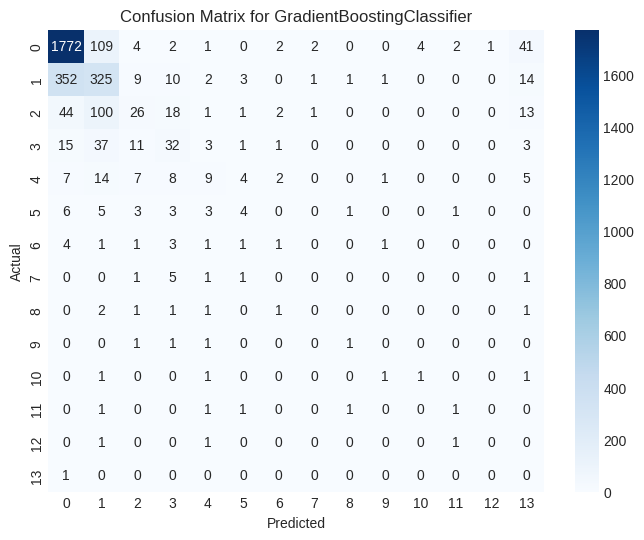

Model: LogisticRegression
Accuracy of the Model: 0.6822731675815306

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84      1940
           1       0.47      0.41      0.44       718
           2       0.19      0.05      0.08       206
           3       0.25      0.17      0.21       103
           4       0.16      0.05      0.08        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.20      0.20      0.20         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.68      3097
   macro avg       0.15      0.13      0.

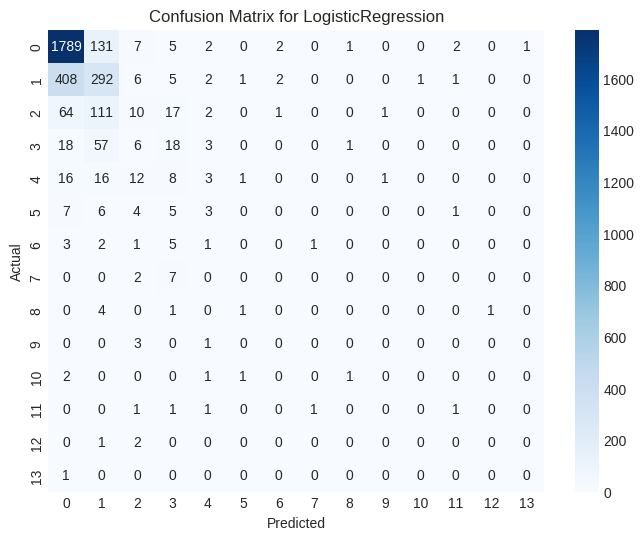

Model: RidgeClassifier
Accuracy of the Model: 0.6638682596060704

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82      1940
           1       0.40      0.28      0.33       718
           2       0.05      0.00      0.01       206
           3       0.25      0.02      0.04       103
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.66      3097
   macro avg       0.10      0.09      0.09 

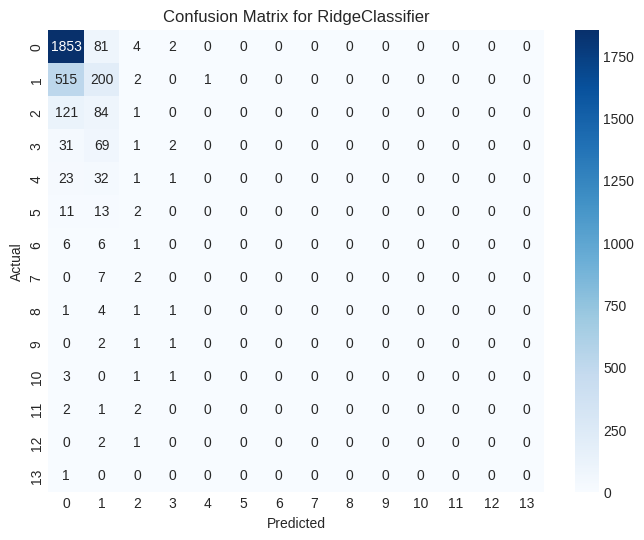

In [ ]:
# Loop through models
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy of the Model: {accuracy}")
    print("\nClassification Report:\n", classification)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()


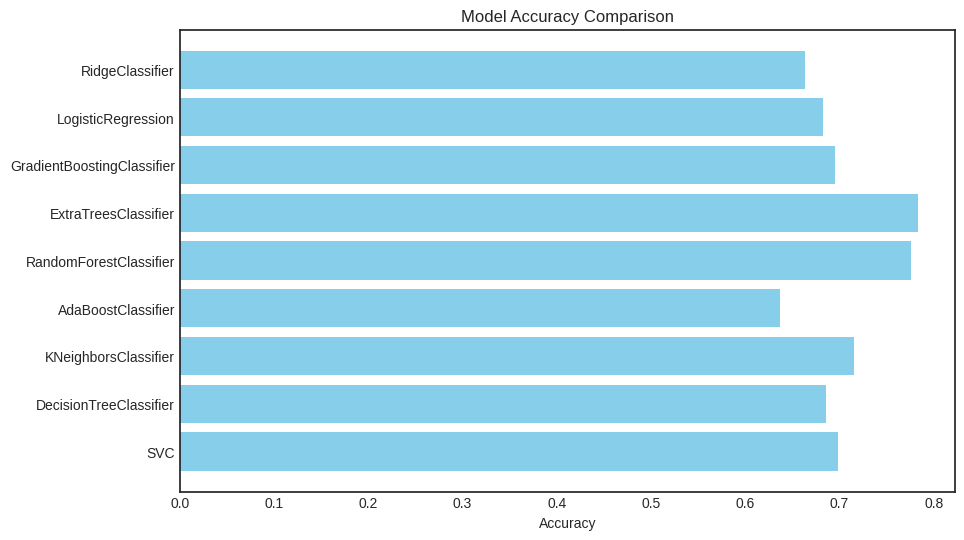

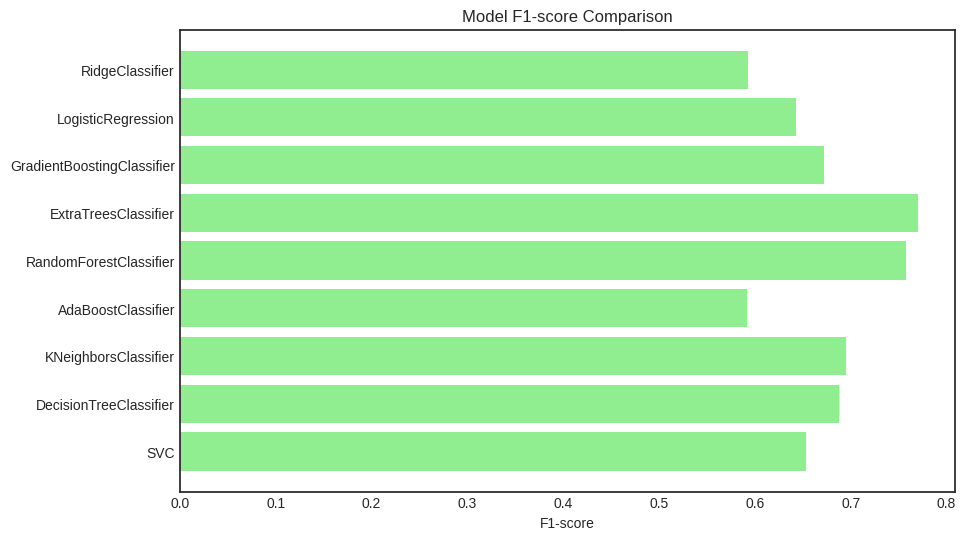

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.barh(results_df['model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
plt.barh(results_df['model'], results_df['F1-score'], color='lightgreen')
plt.xlabel('F1-score')
plt.title('Model F1-score Comparison')
plt.show()


Classification did perform better than regression. But still only predicted correctly for only half of the data points. Linear regression didnt converge. The RandomForestClassifier and ExtraTreesClassifier both gave an acuracy of 78%, meaning it correctly predicted the correct bin 78% of the time. I wonder what the bins look like and how they are arranged by neigborhoud...

#Try regression on less of my data

In [ ]:
encoded = encoded.drop(['latitude', 'longitude', 'days_available_60', 'days_available_30', 'maximum_nights', 'minimum_nights_required'], axis=1)

In [ ]:
y = encoded['price']
X = encoded.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

models = [
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'model': type(model).__name__,
        'MSE': mse,
        'R2': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

                        model           MSE            R2
0                         SVR  2.190816e+03  5.113732e-01
1       DecisionTreeRegressor  1.744231e+02  9.610977e-01
2         KNeighborsRegressor  7.075670e+02  8.421884e-01
3           AdaBoostRegressor  1.411993e+02  9.685077e-01
4       RandomForestRegressor  9.220409e+01  9.794353e-01
5         ExtraTreesRegressor  9.505640e+01  9.787992e-01
6   GradientBoostingRegressor  1.123535e+02  9.749413e-01
7            LinearRegression  1.872410e+21 -4.176114e+17
8                       Ridge  1.468203e+02  9.672541e-01
9                       Lasso  1.506535e+02  9.663991e-01
10                 ElasticNet  5.998856e+02  8.662050e-01


The regression using this data is a lot better than the ones using the other data. Linear regression is really off for this one though.

#Try classification on less of my data

In [ ]:
bins = range(0, 800, 50)  # Creating bins from 0 to 750 with intervals of 50
labels = range(len(bins) - 1)
encoded['price_binned'] = pd.cut(encoded['price'], bins=bins, labels=labels, include_lowest=True)

# Define X and y
y = encoded['price_binned']
X = encoded.drop(['price', 'price_binned'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Classifier models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    RidgeClassifier()
]

# Loop through models
results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results.append({
        'model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                        model  Accuracy  Precision    Recall  F1-score
0                         SVC  0.678076   0.610901  0.678076  0.627067
1      DecisionTreeClassifier  0.673555   0.681059  0.673555  0.676840
2        KNeighborsClassifier  0.701970   0.666097  0.701970  0.678796
3          AdaBoostClassifier  0.607039   0.533602  0.607039  0.561987
4      RandomForestClassifier  0.750081   0.723258  0.750081  0.730099
5        ExtraTreesClassifier  0.754278   0.733096  0.754278  0.739960
6  GradientBoostingClassifier  0.710365   0.671670  0.710365  0.679476
7          LogisticRegression  0.660639   0.586623  0.660639  0.614264
8             RidgeClassifier  0.649984   0.528114  0.649984  0.568026


Lower accuracy than the one with the other data. Random ForestClassifier performed best.

Model: SVC
Accuracy of the Model: 0.6780755569906362

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1940
           1       0.43      0.34      0.38       718
           2       0.31      0.04      0.08       206
           3       0.24      0.17      0.20       103
           4       0.40      0.04      0.06        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       1.00      0.20      0.33         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.68      3097
   macro avg       0.22      0.12      0.14      3097
we

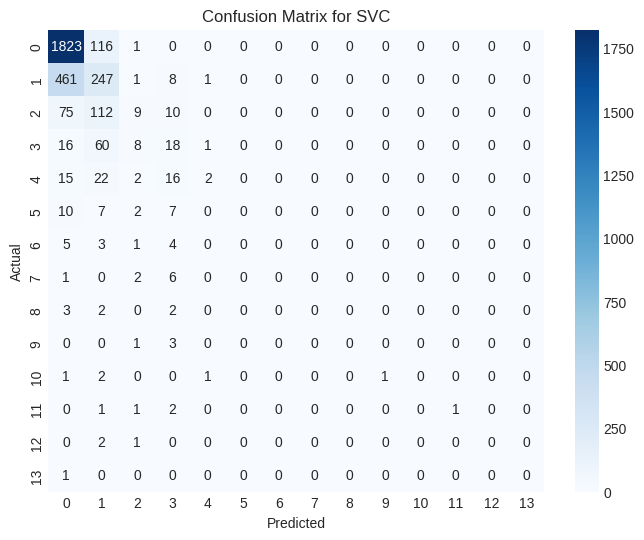

Model: DecisionTreeClassifier
Accuracy of the Model: 0.6793671294801421

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1940
           1       0.52      0.54      0.53       718
           2       0.32      0.37      0.34       206
           3       0.38      0.38      0.38       103
           4       0.29      0.25      0.26        57
           5       0.10      0.12      0.11        26
           6       0.13      0.15      0.14        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.14      0.20      0.17         5
          11       0.25      0.20      0.22         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.68      3097
   macro avg       0.21      0.22    

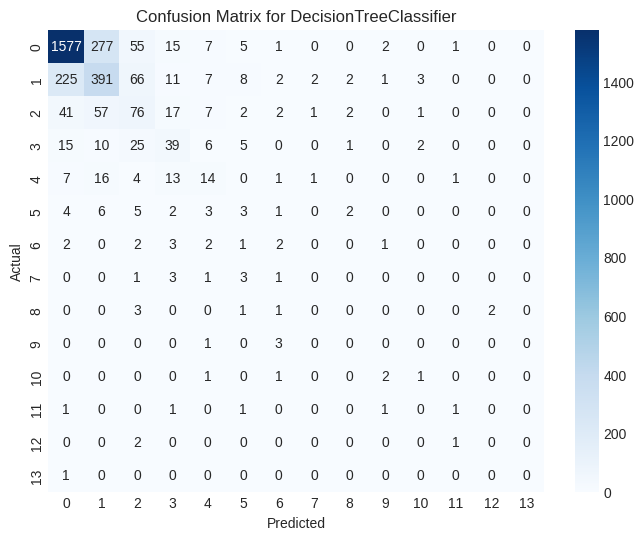

Model: KNeighborsClassifier
Accuracy of the Model: 0.7019696480464966

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1940
           1       0.53      0.46      0.49       718
           2       0.35      0.22      0.27       206
           3       0.38      0.30      0.34       103
           4       0.43      0.16      0.23        57
           5       0.08      0.04      0.05        26
           6       0.43      0.23      0.30        13
           7       0.00      0.00      0.00         9
           8       0.14      0.14      0.14         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.70      3097
   macro avg       0.22      0.18      

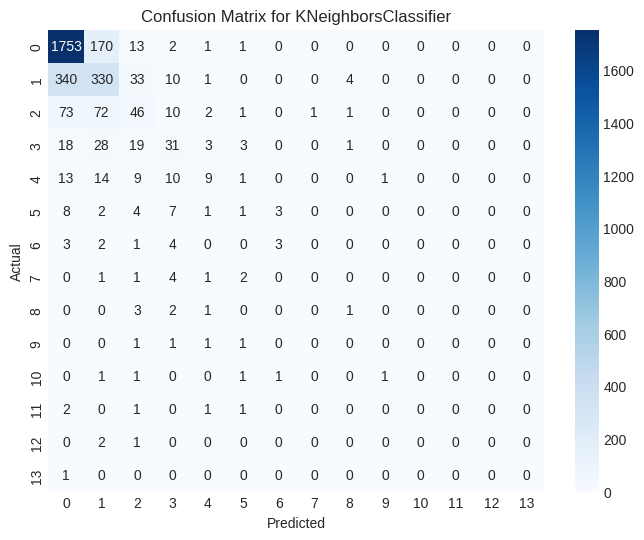

Model: AdaBoostClassifier
Accuracy of the Model: 0.6070390700678076

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      1940
           1       0.33      0.22      0.26       718
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       103
           4       0.17      0.09      0.11        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.33      0.01         3
          13       0.00      0.00      0.00         1

    accuracy                           0.61      3097
   macro avg       0.09      0.11      0.

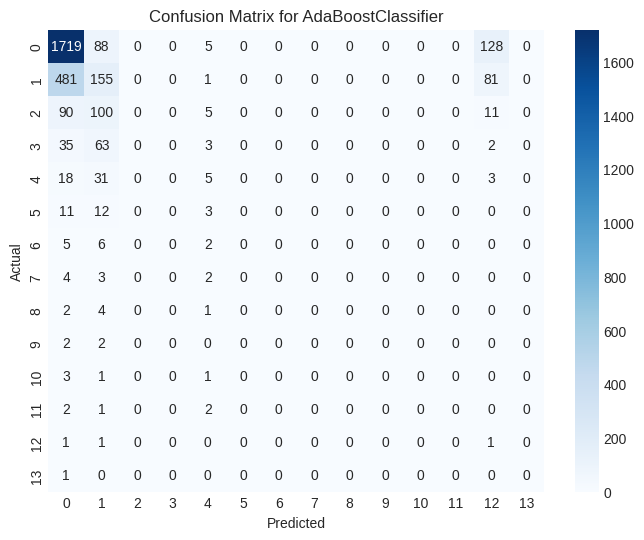

Model: RandomForestClassifier
Accuracy of the Model: 0.7536325476267356

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1940
           1       0.61      0.53      0.57       718
           2       0.51      0.33      0.40       206
           3       0.52      0.44      0.47       103
           4       0.64      0.25      0.35        57
           5       0.54      0.27      0.36        26
           6       0.50      0.08      0.13        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.33      0.20      0.25         5
          11       0.50      0.20      0.29         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.75      3097
   macro avg       0.35      0.23    

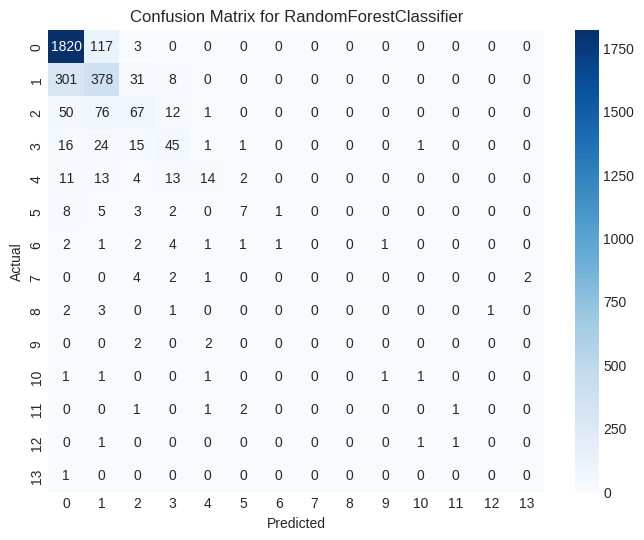

Model: ExtraTreesClassifier
Accuracy of the Model: 0.7536325476267356

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1940
           1       0.61      0.55      0.58       718
           2       0.49      0.36      0.41       206
           3       0.49      0.45      0.47       103
           4       0.57      0.28      0.38        57
           5       0.44      0.42      0.43        26
           6       0.29      0.15      0.20        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.25      0.20      0.22         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.75      3097
   macro avg       0.28      0.24      

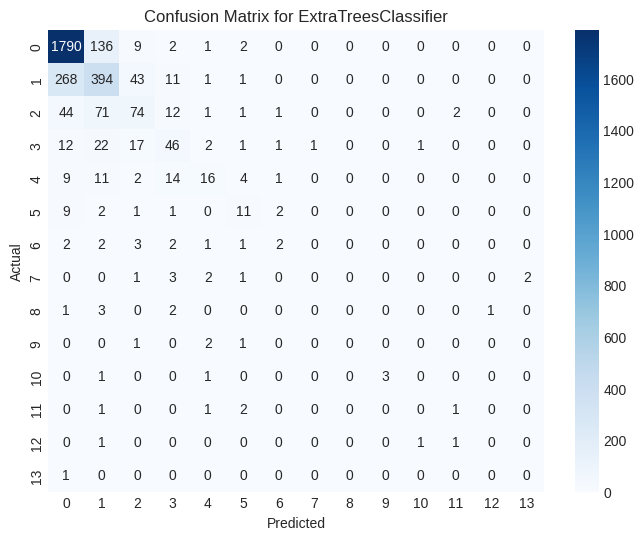

Model: GradientBoostingClassifier
Accuracy of the Model: 0.7135938004520503

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      1940
           1       0.54      0.42      0.47       718
           2       0.49      0.17      0.26       206
           3       0.37      0.30      0.33       103
           4       0.41      0.19      0.26        57
           5       0.47      0.31      0.37        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.25      0.40      0.31         5
          11       0.50      0.20      0.29         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.71      3097
   macro avg       0.27      0.21

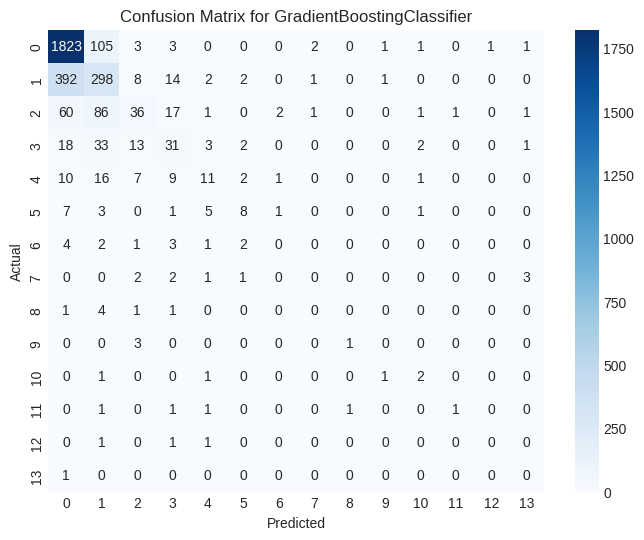

Model: LogisticRegression
Accuracy of the Model: 0.6606393283823054

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      1940
           1       0.40      0.31      0.35       718
           2       0.12      0.03      0.05       206
           3       0.24      0.17      0.20       103
           4       0.19      0.05      0.08        57
           5       0.00      0.00      0.00        26
           6       0.20      0.08      0.11        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.33      0.40      0.36         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.66      3097
   macro avg       0.16      0.14      0.

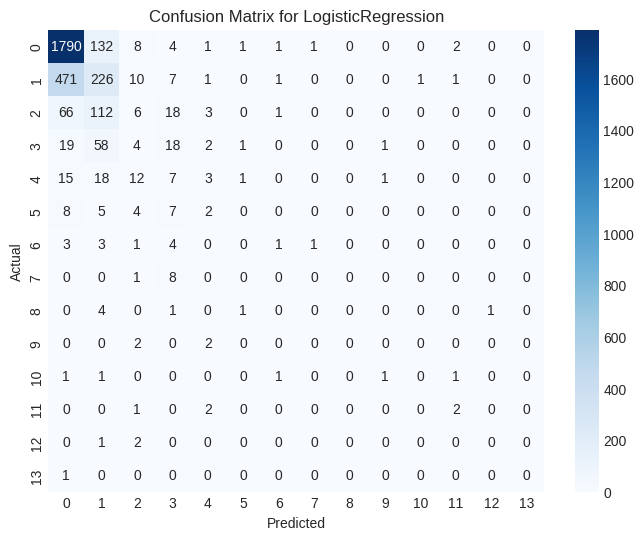

Model: RidgeClassifier
Accuracy of the Model: 0.6499838553438811

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82      1940
           1       0.33      0.19      0.24       718
           2       0.09      0.01      0.02       206
           3       0.12      0.01      0.02       103
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.65      3097
   macro avg       0.09      0.08      0.08 

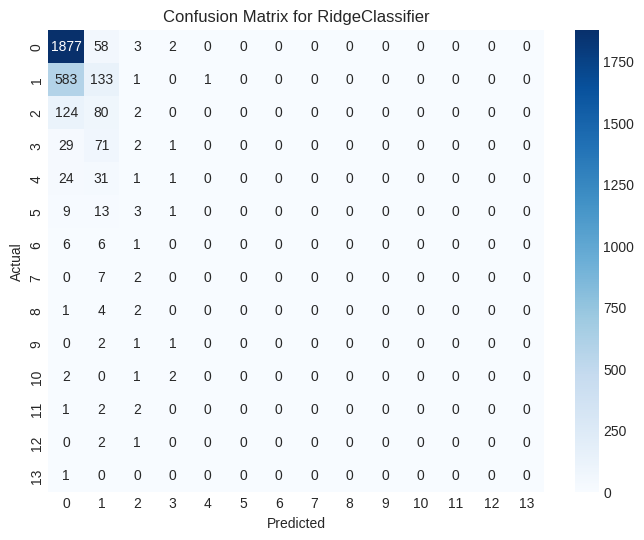

In [ ]:
# Loop through models
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy of the Model: {accuracy}")
    print("\nClassification Report:\n", classification)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()


To predict what price a property in bangkok should be listed at based on different features, I think all the data should be used and the prices should be binned, and Extra trees classifer should be used to predict what price bin the property should go into and that could help rental owners know around what price range to list their home at.

#DBSCAN on Data

I want to see if it could correctly predict bangkok neighborhoods.

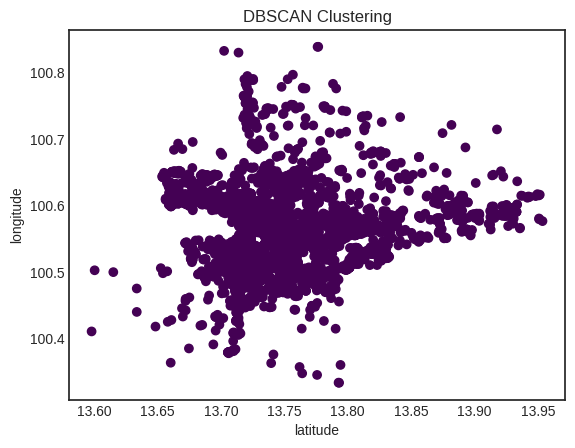

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X_clustering = cleaned_listings_data[['latitude', 'longitude']]

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust these parameters based on your data density
clusters = dbscan.fit_predict(X_clustering)

# Plotting
plt.scatter(X_clustering['latitude'], X_clustering['longitude'], c=clusters, cmap='viridis')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
X_clustering.head()

latitude  longitude
0  13.75983  100.54134
3  13.83026  100.52082
5  13.78823  100.57256
6  13.83148  100.52307
7  13.68556  100.49535

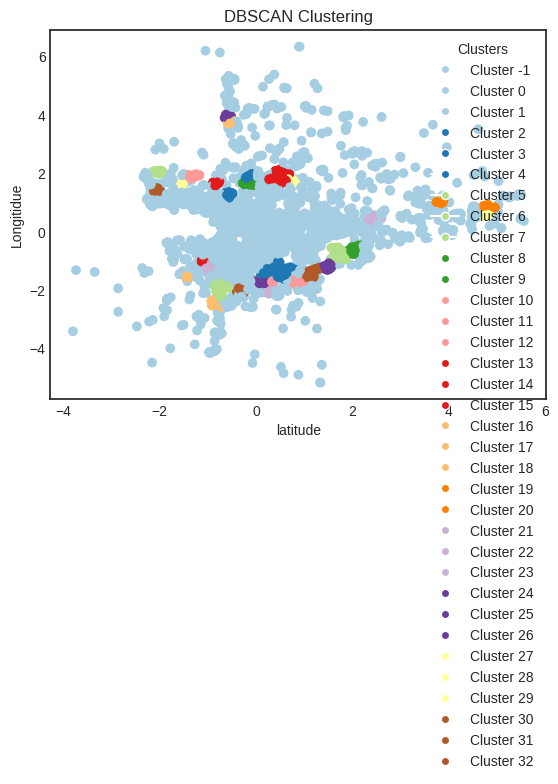

In [ ]:

X_clustering = cleaned_listings_data[['latitude', 'longitude']]
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', label=np.unique(y_pred))
    plt.title("DBSCAN")
    # Generate a custom legend
    unique_labels = np.unique(y_pred)
    colors = [plt.cm.Paired(each) for each in np.linspace(0, 1, len(unique_labels))]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                                markerfacecolor=color, markersize=6) for i, color in zip(unique_labels, colors)]
    plt.legend(handles=custom_legend, title="Clusters")

    # Add titles and labels (optional)
    plt.title("DBSCAN Clustering")
    plt.xlabel("latitude")
    plt.ylabel("Longitidue")

dbscan(X_clustering,0.1, 12)

DBSCAN is not a good tool to use for my data. These values did not cluster my data well or in a meaningful way.

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
# Calculate a distance matrix with selected variables
X = cleaned_listings_data[['latitude', 'longitude']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pdist() calculates pairs of distances between each instance in the dataset
dist = pdist(X)

clusterModel = linkage(dist, method='single')

# Compute the distance matrix
dist = pdist(X_scaled)

# Perform hierarchical clustering using the centroid method
#clusterModel = linkage(dist, method='centroid')
print(clusterModel)

[[1.18100000e+04 1.21390000e+04 0.00000000e+00 2.00000000e+00]
 [1.21400000e+04 1.23860000e+04 0.00000000e+00 3.00000000e+00]
 [4.29800000e+03 4.34300000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [2.47660000e+04 2.47670000e+04 3.88735707e-02 1.23830000e+04]
 [1.06800000e+04 2.47680000e+04 4.61452584e-02 1.23840000e+04]
 [2.07460000e+04 2.47690000e+04 4.62151115e-02 1.23860000e+04]]


In [ ]:
num_rows = len(clusterModel)
num_rows

12385

##12385 merges in this - I'm not going to plot it all since it will take a long time and look like a tornado

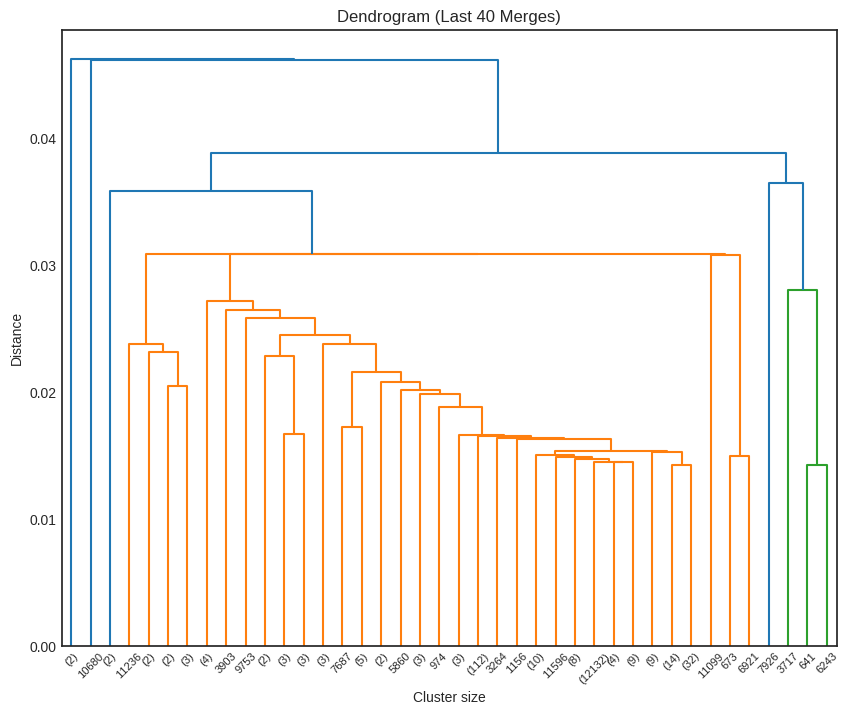

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  # Ensure dendrogram is imported

# Assuming 'clusterModel' is your linkage matrix
plt.figure(figsize=(10, 8))
dendrogram(clusterModel, truncate_mode='lastp', p=40, show_leaf_counts=True)
plt.title('Dendrogram (Last 40 Merges)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


There is a lot of very closly related data points. But, I cant visualize the entire thing to determine the amount of clusters I should use.

#TPOT

This is with the data with less features.

In [ ]:
y = encoded['price']
X = encoded.drop(['price'],axis=1)

X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_bangkok_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -105.3340035455816

Generation 2 - Current best internal CV score: -103.53460586438601

Generation 3 - Current best internal CV score: -101.99388777508757

Generation 4 - Current best internal CV score: -100.91000449132738

Generation 5 - Current best internal CV score: -99.1400814216455

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
-93.76763625509098


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = tpot.predict(X_test)

# Calculate different metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 7.23256790318554
Mean Squared Error (MSE): 93.76763625509098
Root Mean Squared Error (RMSE): 9.683369054987576
R-squared: 0.97908660943722


In [ ]:
from xgboost import XGBRegressor
# Setting up the XGBRegressor with the specified parameters
model = ExtraTreesRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=10, n_estimators=100)


# Fitting the model
model.fit(X_train, y_train)

## Evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 144.7209860856558


This MSE does makes sense, unlike the others

We can potentially predict prices for housing based on those features (if we have them). But it won't be 100% accurate. So, I'm thinking that it can be used more for home owners who want to list on airbnb but don't know at what price they should list their home at. This can help.

# Can we predict accomodation prices in bangkok for 2025?

In [ ]:
X = cleaned_listings_data.drop('price', axis=1)
y = cleaned_listings_data['price']

# Encoding categorical data and scaling numerical data
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=[np.number]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))


R^2 Score: 0.39952370984265273


We can't confidently predict accomodation prices for 2025 using linear regression

##predict next years prices

ADF Statistic: -4.438281
p-value: 0.000254


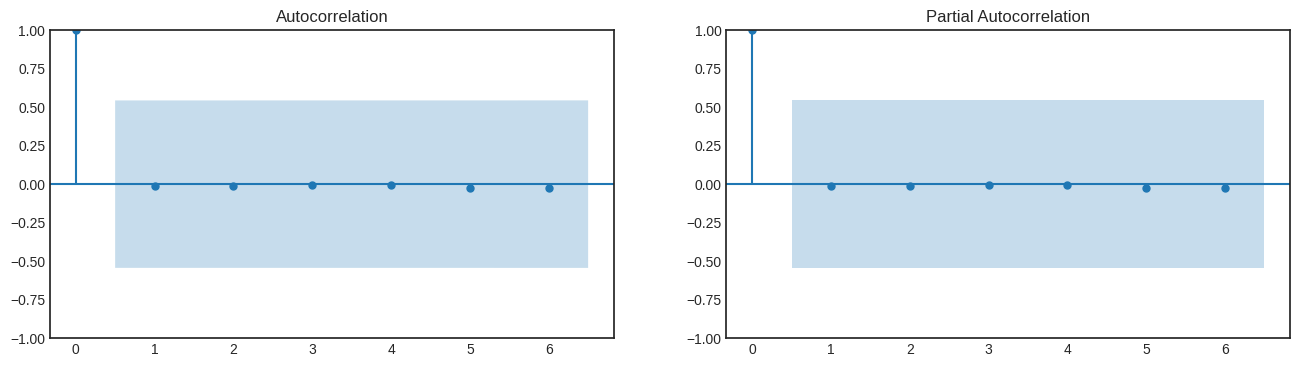

2025-01-31    2927.137283
2025-02-28    2927.271600
2025-03-31    2927.284838
2025-04-30    2927.286142
2025-05-31    2927.286271
2025-06-30    2927.286283
2025-07-31    2927.286285
2025-08-31    2927.286285
2025-09-30    2927.286285
2025-10-31    2927.286285
2025-11-30    2927.286285
2025-12-31    2927.286285
2026-01-31    2927.286285
2026-02-28    2927.286285
2026-03-31    2927.286285
2026-04-30    2927.286285
2026-05-31    2927.286285
2026-06-30    2927.286285
2026-07-31    2927.286285
2026-08-31    2927.286285
2026-09-30    2927.286285
2026-10-31    2927.286285
2026-11-30    2927.286285
2026-12-31    2927.286285
Freq: ME, Name: predicted_mean, dtype: float64


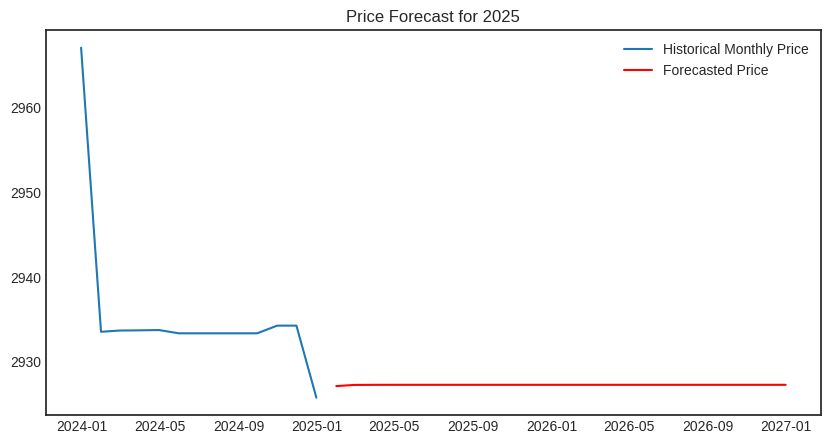

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

# Example data preparation
cleaned_calendar_data['date'] = pd.to_datetime(cleaned_calendar_data['Year'].astype(str) + '-' + cleaned_calendar_data['Month'].astype(str)) + MonthEnd(1)
monthly_data = cleaned_calendar_data.groupby('date')['price'].mean().reset_index()
monthly_data.set_index('date', inplace=True)
monthly_data = monthly_data.asfreq('M')


from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_data['price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value is high, difference the series
if result[1] > 0.05:
    monthly_data['price_diff'] = monthly_data['price'].diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(monthly_data['price'].dropna(), ax=ax1)
plot_pacf(monthly_data['price'].dropna(), ax=ax2)
plt.show()

# Fit the model
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(monthly_data['price'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=24)  # Forecasting for 2 years
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=25, freq='M')[1:]

forecast_series = pd.Series(forecast, index=forecast_index)
print(forecast_series)

plt.figure(figsize=(10, 5))
plt.plot(monthly_data['price'], label='Historical Monthly Price')
plt.plot(forecast_series, label='Forecasted Price', color='red')
plt.title('Price Forecast for 2025')
plt.legend()
plt.show()


We cant predict the prices for next yeer confidently without more information and more features from the data. Theres always fluctuation and this forecast isnt showing them.

#What neighbourhood in Bangkok is cheapest?

In [ ]:
cheapest_neighbourhood = cleaned_listings_data.groupby('bangkok_neighbourhood')['price'].mean().idxmin()
print("Cheapest Neighbourhood:", cheapest_neighbourhood)


Cheapest Neighbourhood: Bang Khae


#Whats the cheapest season for each neighbourhood?

In [ ]:
for_merge_l = listings_data.copy()
for_merge_c = cleaned_calendar_data.copy()

In [ ]:
for_merge_l['price'] = for_merge_l['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
print(for_merge_c.columns)
print(for_merge_l.columns)

Index(['listing_id', 'available', 'price', 'minimum_nights', 'maximum_nights',
       'Month', 'Day', 'Year', 'date'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maxim

In [ ]:
merged_data = pd.merge(for_merge_c,
                       for_merge_l[['id', 'neighbourhood_cleansed', 'room_type', 'price']],
                       left_on='listing_id',
                       right_on='id',
                       how='left')


In [ ]:
merged_data.head()

listing_id  available  price_x  minimum_nights  maximum_nights  Month  Day  \
0       27934      False     55.0             3.0            90.0     12   27   
1       27934      False     55.0             3.0            90.0     12   28   
2       27934      False     55.0             3.0            90.0     12   29   
3       27934      False     55.0             3.0            90.0     12   30   
4       27934      False     55.0             3.0            90.0     12   31   

   Year       date     id neighbourhood_cleansed        room_type  price_y  
0  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0  
1  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0  
2  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0  
3  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0  
4  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0

In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'

# Ensure 'date' column is a datetime type
merged_data['season'] = merged_data['Month'].apply(get_season)

merged_data.head()

In [ ]:
# Group by neighborhood and season to find the average price
average_price_per_neighborhood_season = merged_data.groupby(['neighbourhood_cleansed', 'season'])['price_x'].mean().reset_index()

# Finding the cheapest season for each neighborhood
cheapest_season = average_price_per_neighborhood_season.loc[average_price_per_neighborhood_season.groupby('neighbourhood_cleansed')['price_x'].idxmin()]
print(cheapest_season)


    neighbourhood_cleansed  season      price_x
0                 Bang Bon    Fall  3538.285714
7                Bang Kapi  Winter  2138.432183
8                Bang Khae    Fall  2609.402299
15               Bang Khen  Winter  4142.137808
19           Bang Kho laen  Winter  1682.340857
20         Bang Khun thain    Fall  5725.086957
27                 Bang Na  Winter  2052.401949
28              Bang Phlat    Fall  1431.349869
35                Bang Rak  Winter  2888.112851
39                Bang Sue  Winter  1323.347501
42             Bangkok Noi  Summer  3666.652174
44             Bangkok Yai    Fall  1513.877193
51               Bueng Kum  Winter  1551.437250
55              Chatu Chak  Winter  3144.835605
56              Chom Thong    Fall  1590.564356
63               Din Daeng  Winter  3932.961895
67              Don Mueang  Winter  1170.003957
68                   Dusit    Fall  1446.163793
75             Huai Khwang  Winter  4332.296047
76             Khan Na Yao    Fall  3896

Winter is the cheapest season for a lot of the neighbourhoods followed by fall and then summer.

In [ ]:
# Convert the boolean 'available' column to integers
merged_data['available_int'] = merged_data['available'].astype(int)

# Calculate the proportion of availability by season using the integer column
availability_by_season = merged_data.groupby('season')['available_int'].mean().reset_index()

# Rename columns for clarity
availability_by_season.rename(columns={'available_int': 'proportion_available'}, inplace=True)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=availability_by_season, x='season', y='proportion_available')
plt.title('Proportion of Days Available by Season')
plt.ylabel('Proportion Available')
plt.show()

Spring has the most availabitites. This makes sense and its the start of monsoon season. Summer as well. Fall and winter have the least days available which is when holidays are and the weather is sunnier and less stormy. There may also be events then.

#How does seasons affect the pricing and availability of listings?

In [ ]:
# Group by season to calculate average price and availability
seasonal_pricing = merged_data.groupby('season')['price_x'].mean().reset_index()
seasonal_availability = merged_data.groupby('season')['available'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=seasonal_pricing, x='season', y='price_x')
plt.title('Average Price by Season')

plt.subplot(1, 2, 2)
sns.barplot(data=seasonal_availability, x='season', y='available')
plt.title('Average Availability by Season')
plt.show()


It doesnt seem like the mean price changes very much by season, but the availabilty does with spring having the most available and fall having the least.

In [ ]:
merged_data.head()

listing_id  available  price_x  minimum_nights  maximum_nights  Month  Day  \
0       27934      False     55.0             3.0            90.0     12   27   
1       27934      False     55.0             3.0            90.0     12   28   
2       27934      False     55.0             3.0            90.0     12   29   
3       27934      False     55.0             3.0            90.0     12   30   
4       27934      False     55.0             3.0            90.0     12   31   

   Year       date     id neighbourhood_cleansed        room_type  price_y  \
0  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0   
1  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0   
2  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0   
3  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0   
4  2023 2023-12-31  27934            Ratchathewi  Entire home/apt   1903.0   

   season  available_int  
0  Winter              0  
1  Winter              0  
2  Winter              0  
3  Winter              0  
4  Winter              0

#Which neighborhoods show the highest variability in pricing within the same room type?

In [ ]:
# Assuming 'house_type' is part of your data
variance_in_pricing = merged_data.groupby(['neighbourhood_cleansed', 'room_type'])['price_y'].var().reset_index()
high_variance_neighborhoods = variance_in_pricing[variance_in_pricing['price_y'] == variance_in_pricing['price_y'].max()]
print(high_variance_neighborhoods)


#Conclusion

In conclusion, it was found that we were not able to confidently address the primary research questions: Can we predict accommodation prices in Bangkok for 2025? And can we predict what price a property in Bangkok should be listed at based on different features?

To address the first question, I performed linear regression on the listings data to see if we could predict prices based on that data; however, the model did not perform well. I also used Time Series Analysis (ARIMA) to forecast pricing trends up to 2025. This model indicated that while there is some predictability in price trends based on past data, external factors can significantly affect predictability.

To address the second question, multiple regression models were employed, analyzing both full and reduced sets of features, and binning the prices to perform classification models on both. It was found that Random Forest and Extra Trees Regressors provided the best performance. However, the Mean Squared Error (MSE) was unreasonably high for my data, with an error much larger than my dataset's prices, amounting to 1749.774 USD. The R² values were 0.6 and 0.62, respectively. For classification on all the data, Random Forest Classifier and Extra Trees Classifier performed the best, with Random Forest achieving an accuracy of 0.775 and Extra Trees reaching an accuracy of 0.781. Based on this, I would recommend using classification to predict a price bin for listings based on various features of the property.

Additionally, I tested the models using fewer columns and removing latitude and longitude. Again, Random Forest and Extra Trees Regressors performed the best among the regression models, and the MSE was more reasonable than that with all the data, with values of 92.64997 and 95.56458 USD, which make sense for my data. The classification on less of my data performed slightly worse than with all the data but was still nearly the same. RandomForestClassifier performed the best with an accuracy of 0.754924.

I also ran TPOT on my data with fewer columns, and it suggested that the Extra Trees Classifier. But, it gave errors so I deleted the rest.

DBSCAN and dendrogram were tried but were not able to cluster my data well. K-means was able to cluster the latitude and longitude data based on neighborhoods. Through the exploration of smaller questions, we discovered that:

    Bang Khae emerged as the cheapest neighborhood, offering more affordable accommodation options.
    Seasonal analysis revealed that winter generally offers the lowest prices, although this varies by neighborhood. This suggests that timing plays a crucial role in cost-effective travel planning.
    Our findings also highlighted the influence of seasons on both pricing and availability, indicating a higher availability during spring, likely due to the onset of the monsoon season.
    Neighborhood Variability: Significant price variability was observed within neighborhoods based on room types. This suggests that even within the same geographical area, property specifics can drastically influence pricing.

Additional findings include:

    Entire homes have the lowest average days available, suggesting higher demand or preference for privacy.
    Vadhana, with the highest number of properties and an average availability of only 200 days, is a tourist hotspot, indicating high demand and popularity.
    The average price increased in April and October, the dry months in Bangkok, while June to September, the monsoon season, saw the lowest average prices, reflecting seasonal demand fluctuations.
    Some neighborhoods like Nong Chok and Kholong Sam Wai, despite having high availability, have very few listings, indicating a lack of data which could affect the accuracy of predictions.
    Bang Kapi shows the highest average monthly price but with minimal fluctuation, suggesting stable demand throughout the year.
This information can be used by property owners to identify the price bins at which they should list their properties based on different features of the property. It can also be used by renters to determine the best time to visit Bangkok to take advantage of lower prices and to understand which neighborhoods offer lower prices and other benefits.